In [1]:
from QuantumCircuitGraph import QuantumCircuitGraph
import qiskit
import matplotlib.pyplot as plt

In [2]:
# Settings

GATE_TYPE_MAP = {
    'cx': 0, 
    'h': 1, 
    'x': 2,
    'z': 3,
    # Add here all possible gate types
} # map gate type to index in one-hot encoding
# add id always in last position
GATE_TYPE_MAP['id'] = len(GATE_TYPE_MAP)


QuantumCircuitGraph.set_gate_type_map(GATE_TYPE_MAP)
QuantumCircuitGraph.set_include_params(False)
QuantumCircuitGraph.set_include_identity_gates(False)
QuantumCircuitGraph.set_differentiate_cx(True)


print("Modified GATE_TYPE_MAP:", QuantumCircuitGraph.GATE_TYPE_MAP)
print("Modified include_params:", QuantumCircuitGraph.include_params)
print("Modified include_identity_gates:", QuantumCircuitGraph.include_identity_gates)
print("Modified differentiate_cx:", QuantumCircuitGraph.differentiate_cx)

Modified GATE_TYPE_MAP: {'cx': 0, 'h': 1, 'x': 2, 'z': 3, 'id': 4}
Modified include_params: False
Modified include_identity_gates: False
Modified differentiate_cx: True


# Basic Equivalences

## Null Operations

Select a basic starting circuit to which apply null operations

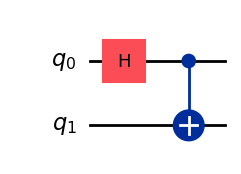

In [3]:
qc_base = qiskit.QuantumCircuit(2)
qc_base.h(0)
qc_base.cx(0, 1)

qc_base.draw(output='mpl')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\melan\shared-folder\Thesis\SSL-for-Quantum-Cirucits-Generation\qiskit-env\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\melan\shared-folder\Thesis\SSL-for-Quantum-Cirucits-Generation\qiskit-env\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\melan\shared-folder\Thesis\SSL-fo

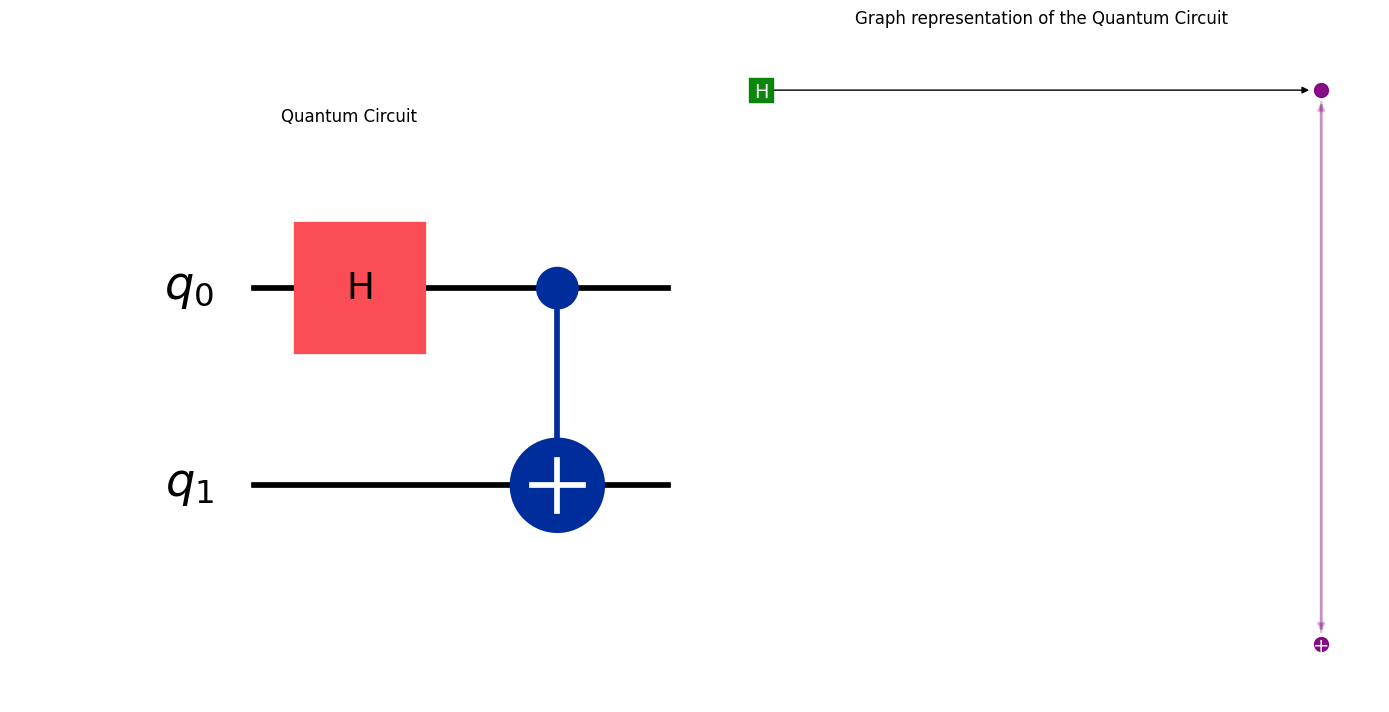

In [4]:
qcg_base = QuantumCircuitGraph(qc_base)
qcg_base.draw_circuit_and_graph(circuit_like_graph=True)

In [5]:
qcg_base.graph

In [6]:
qcg_base.node_feature_matrix

tensor([[0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 1.]])

In [7]:
from networkx import attr_matrix

attr_matrix(qcg_base.graph)

(array([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]),
 ['cx_0_control_5', 'cx_1_target_5', 'h_0_4'])

In [8]:
# Create a list to store the equivalent quantum circuits (tuples of quantum circuits and their corresponding graph)
equivalent_qcs = []

equivalent_qcs.append((qc_base, qcg_base.graph))

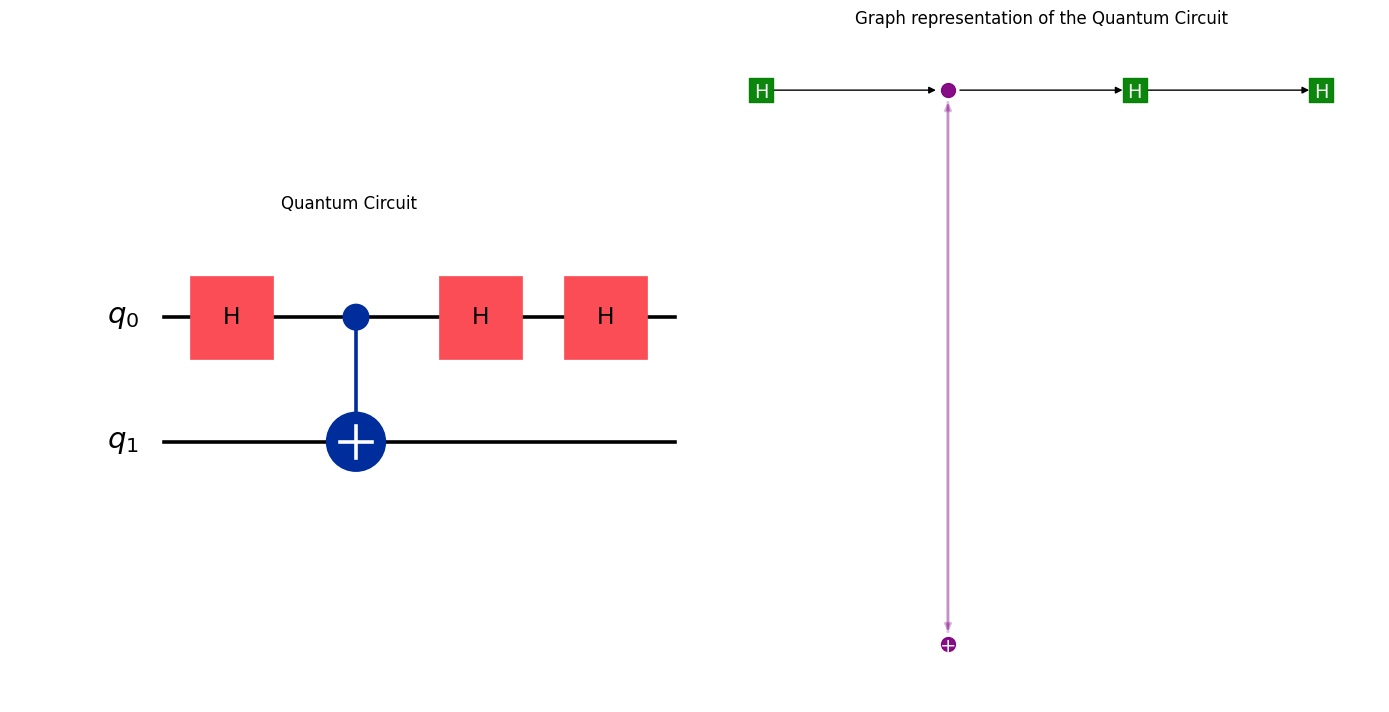

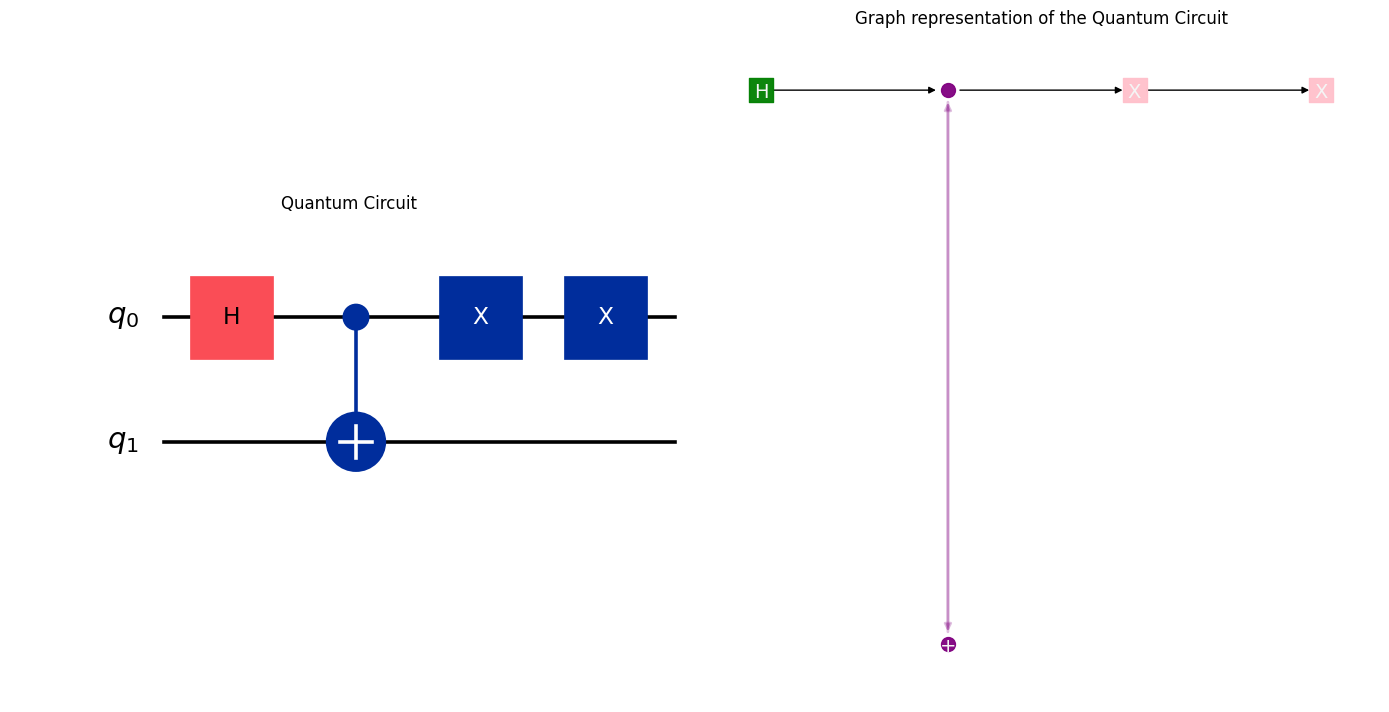

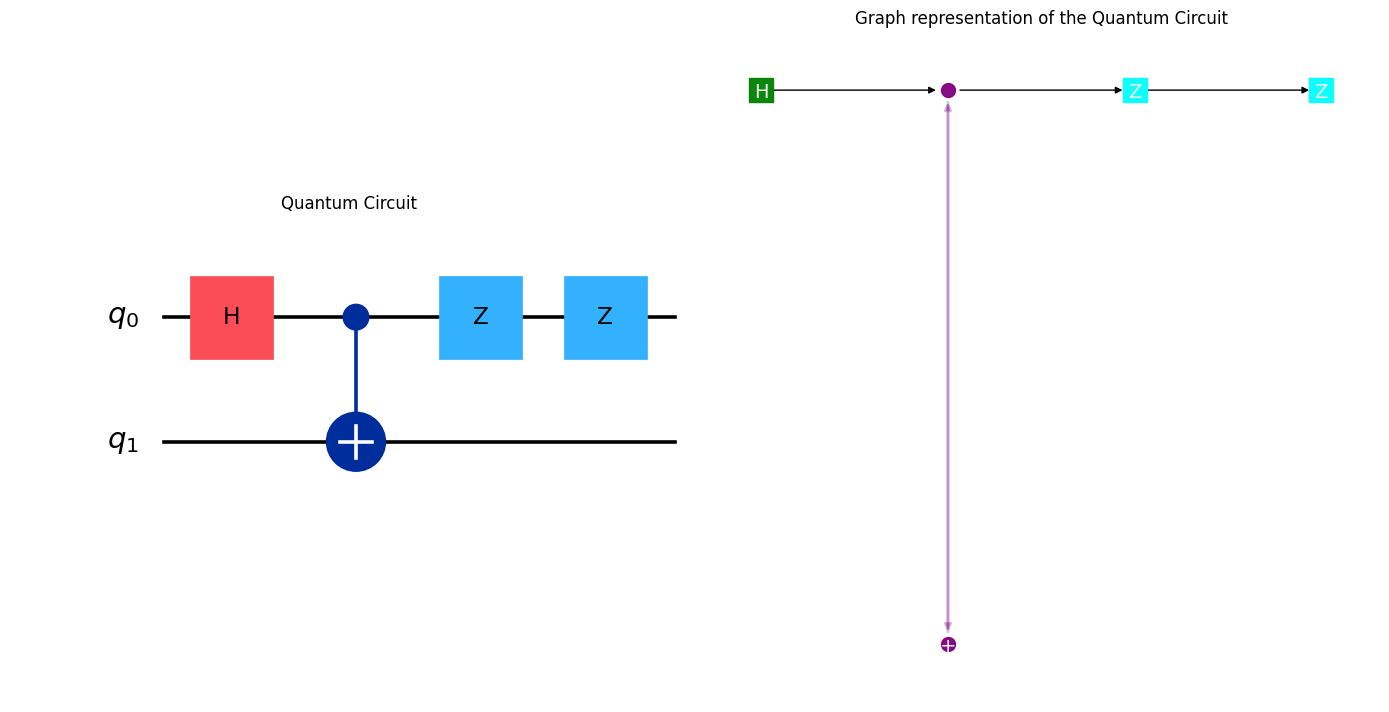

In [9]:
from qiskit.circuit.library.standard_gates import HGate, XGate, YGate, ZGate

# Apply two identical gates to the first qubit (do it for gates H, X, Z)
for u in [HGate(), XGate(), ZGate()]:
    # copy qc_base in a new quantum circuit
    qc = qc_base.copy()

    qc.append(u, [0])
    qc.append(u, [0])

    qcg = QuantumCircuitGraph(qc)
    qcg.draw_circuit_and_graph(circuit_like_graph=True)

    equivalent_qcs.append((qc, qcg.graph))


In [10]:
# Do the same for the second qubit
for u in [HGate(), XGate(), ZGate()]:
    # copy qc_base in a new quantum circuit
    qc = qc_base.copy()

    qc.append(u, [1])
    qc.append(u, [1])

    qcg = QuantumCircuitGraph(qc)
    #qcg.draw_circuit_and_graph(circuit_like_graph=True)

    equivalent_qcs.append((qc, qcg.graph))

In [11]:
# Do the same for the two qubits, but now add the gates before the CNOT
for u in [HGate(), XGate(), ZGate()]:
    # copy qc_base in a new quantum circuit
    qc = qiskit.QuantumCircuit(2)
    qc.h(0)

    qc.append(u, [0])
    qc.append(u, [0])
    qc.cx(0, 1)

    qcg = QuantumCircuitGraph(qc)
    #qcg.draw_circuit_and_graph(circuit_like_graph=True)

    equivalent_qcs.append((qc, qcg.graph))

# Do the same for the second qubit
for u in [HGate(), XGate(), ZGate()]:
    # copy qc_base in a new quantum circuit
    qc = qiskit.QuantumCircuit(2)
    qc.h(0)

    qc.append(u, [1])
    qc.append(u, [1])
    qc.cx(0, 1)

    qcg = QuantumCircuitGraph(qc)
    #qcg.draw_circuit_and_graph(circuit_like_graph=True)

    equivalent_qcs.append((qc, qcg.graph))

# Do the same for the two qubits, but now add the gates before H
for u in [XGate(), ZGate()]:
    # copy qc_base in a new quantum circuit
    qc = qiskit.QuantumCircuit(2)
    qc.append(u, [0])
    qc.append(u, [0])
    qc.h(0)
    qc.cx(0, 1)

    qcg = QuantumCircuitGraph(qc)
    #qcg.draw_circuit_and_graph(circuit_like_graph=True)

    equivalent_qcs.append((qc, qcg.graph))



In [12]:
from math import ceil
from data_preprocessing import draw_circuit_and_graph
import numpy as np

def draw_dataset(dataset, title=None):
    n_samples = len(dataset)
    samples_per_row = 3
    n_rows = ceil(n_samples / samples_per_row)
    add_height = 2
    fig, axs = plt.subplots(n_rows, 2*samples_per_row, figsize=(15, 3*n_samples/3 + add_height*(1/(n_rows)**2)))

    if n_rows == 1:
       axs = np.expand_dims(axs, axis=0)

    # dataset is a list of tuples (qc, qcg)
    for i, (qc, g) in enumerate(dataset):
        row = i // samples_per_row
        col_start = 2 * (i % samples_per_row)
        axs[row, col_start:col_start + 2] 

        draw_circuit_and_graph((qc, g), axs=axs[row, col_start:col_start + 2])
    
    if title is not None:
        plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.axis('off')
    plt.show()

    

In [13]:
# now add two consecutive CNOTs to the base circuit
qc = qc_base.copy()
qc.cx(0, 1)
qc.cx(0, 1)

qcg = QuantumCircuitGraph(qc)
#qcg.draw_circuit_and_graph(circuit_like_graph=True)

equivalent_qcs.append((qc, qcg.graph))

# do the same, but revert control and target qubits
qc = qc_base.copy()
qc.cx(1, 0)
qc.cx(1, 0)

qcg = QuantumCircuitGraph(qc)
#qcg.draw_circuit_and_graph(circuit_like_graph=True)

equivalent_qcs.append((qc, qcg.graph))

# now add them before the first CNOT
qc = qiskit.QuantumCircuit(2)
qc.h(0)

qc.cx(1, 0)
qc.cx(1, 0)
qc.cx(0, 1)

qcg = QuantumCircuitGraph(qc)
#qcg.draw_circuit_and_graph(circuit_like_graph=True)

equivalent_qcs.append((qc, qcg.graph))

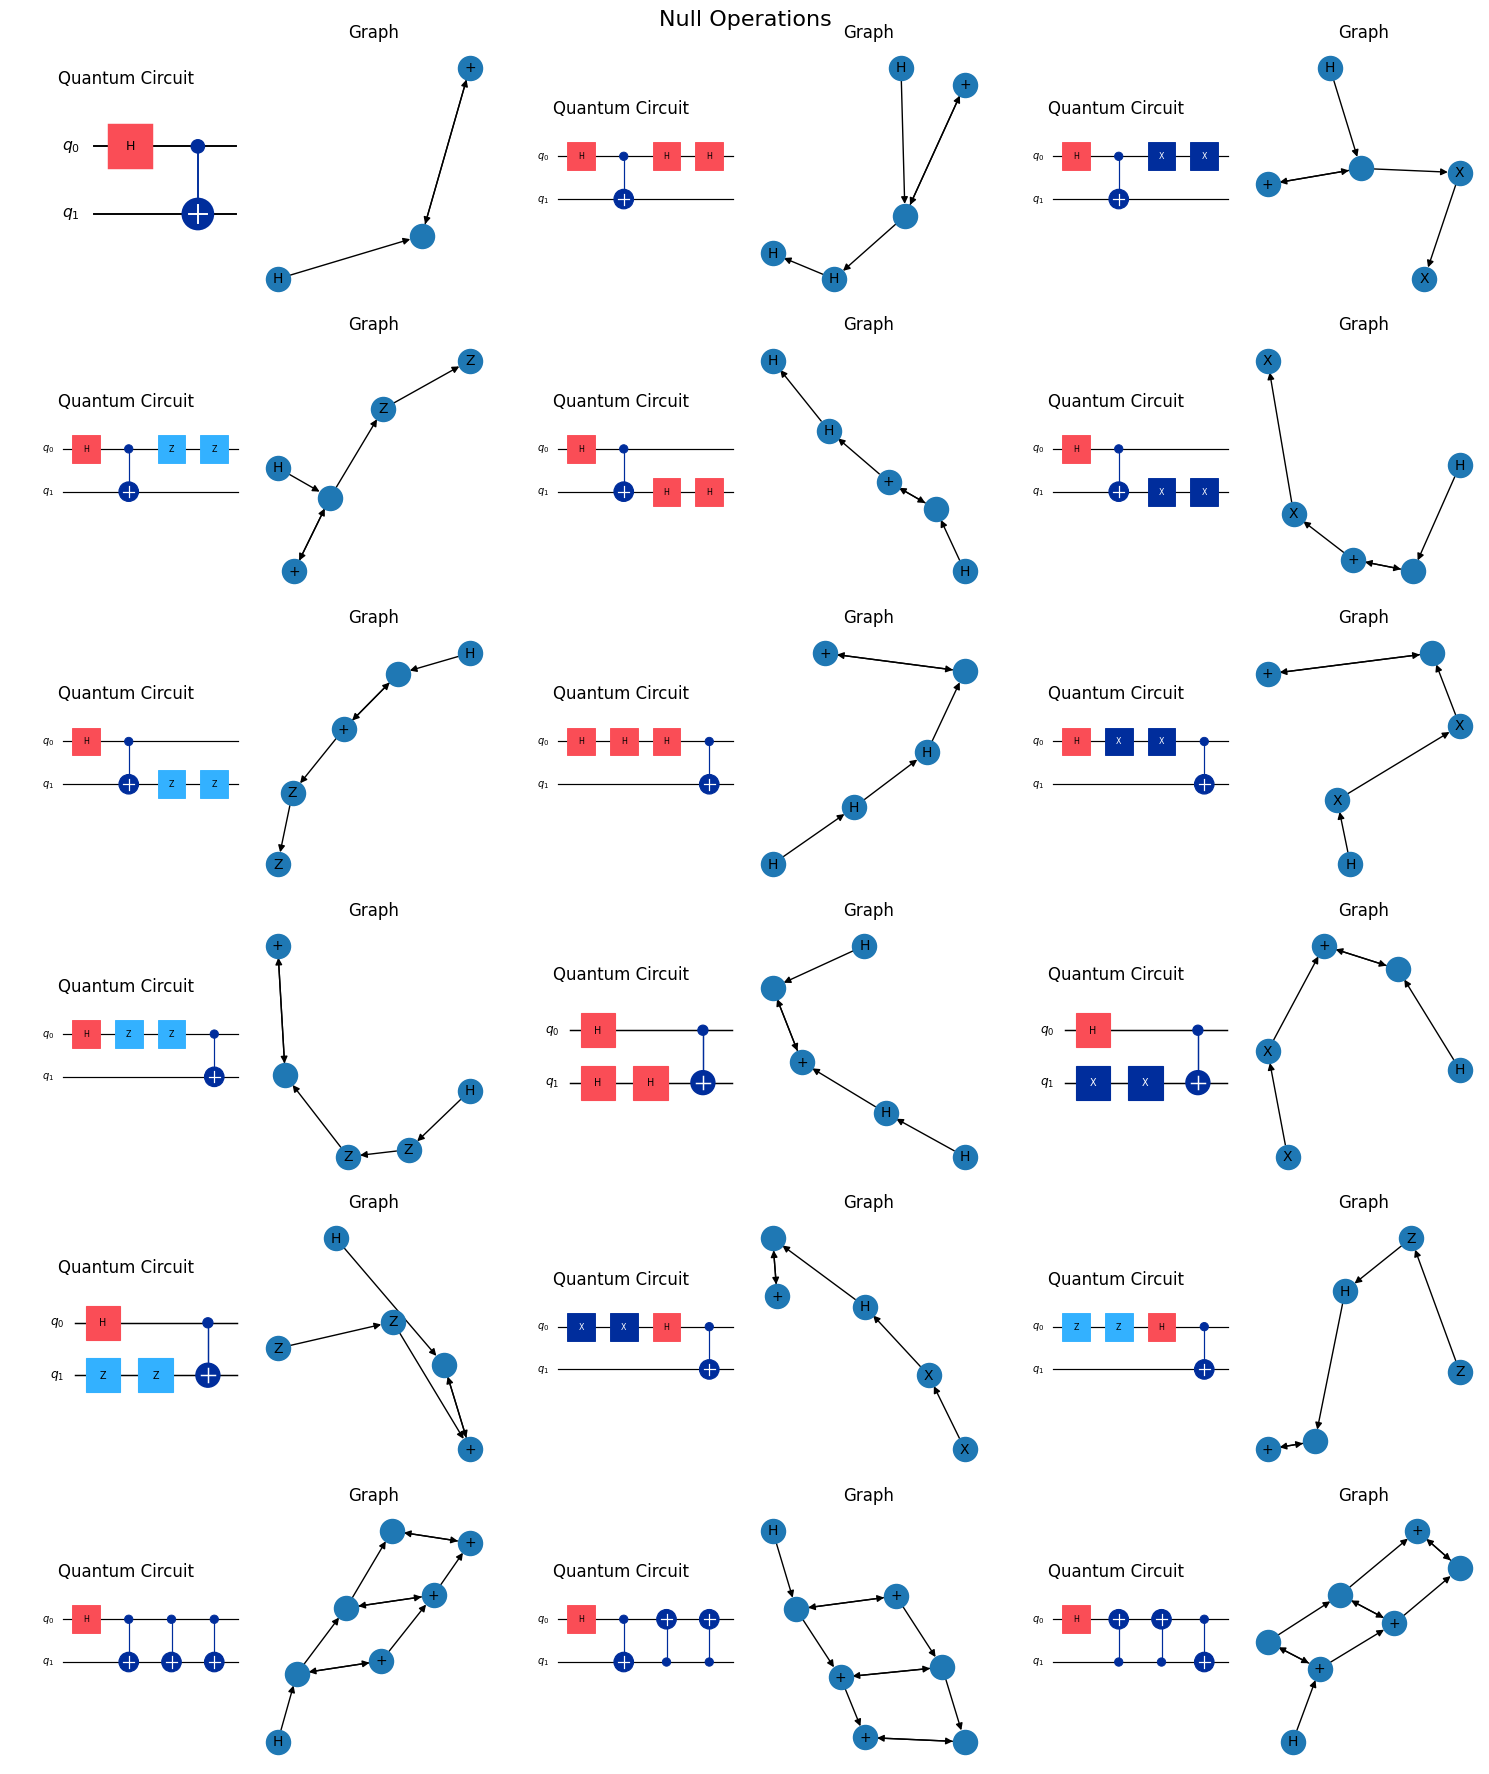

In [14]:
draw_dataset(equivalent_qcs, title='Null Operations')

In [15]:
dataset = {}
dataset['null_ops'] = equivalent_qcs

equivalent_qcs = []

## Commutations

First create a dataset with only the equivalences between commuting gates

In [16]:
# two consecutive CNOTs with the same control qubit, but different target qubits
qc_base = qiskit.QuantumCircuit(3)
# add some gates to make sure the equivalence is not trivial (if not we will obtain the same graph
qc_base.x(1)
qc_base.z(2)

qc_0 = qc_base.copy()
qc_0.cx(0, 1)
qc_0.cx(0, 2)

qcg_0 = QuantumCircuitGraph(qc_0)


qc_1 = qc_base.copy()
qc_1.cx(0, 2)
qc_1.cx(0, 1)

qcg_1 = QuantumCircuitGraph(qc_1)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))

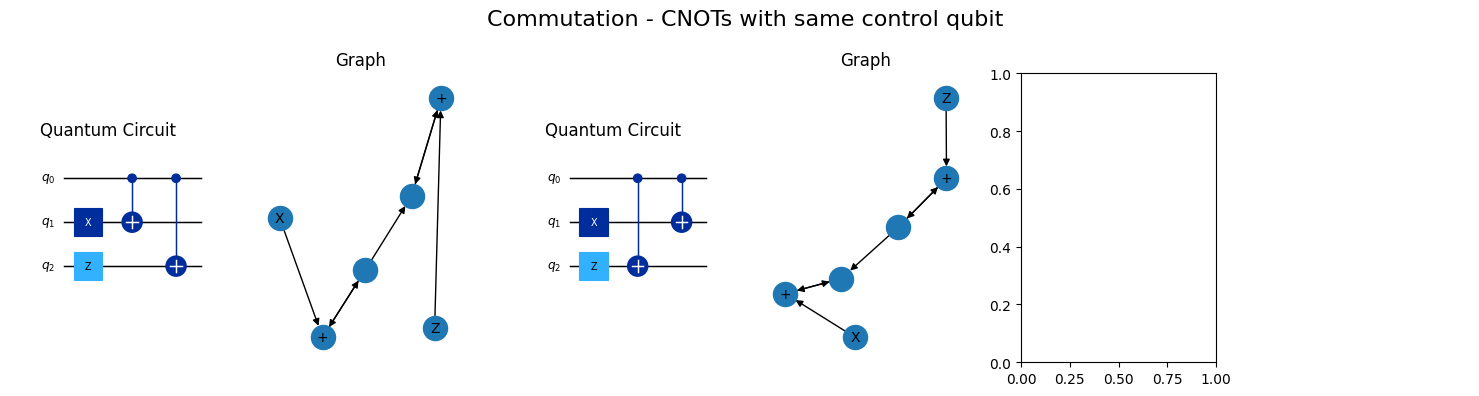

In [17]:
draw_dataset(equivalent_qcs, title='Commutation - CNOTs with same control qubit')

# Dataset section for commutations will be a list of lists of tuples, so a list of lists of equivalent quantum circuits
dataset['commutations'] = [equivalent_qcs]
equivalent_qcs = []

In [18]:
# two consecutive CNOTs with the same target qubit, but different control qubits
qc_base = qiskit.QuantumCircuit(3)
# add some gates to make sure the equivalence is not trivial (if not we will obtain the same graph
qc_base.h(0)
qc_base.z(2)

qc_0 = qc_base.copy()
qc_0.cx(0, 1)
qc_0.cx(2, 1)

qcg_0 = QuantumCircuitGraph(qc_0)
 
qc_1 = qc_base.copy()
qc_1.cx(2, 1)
qc_1.cx(0, 1)   

qcg_1 = QuantumCircuitGraph(qc_1)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))

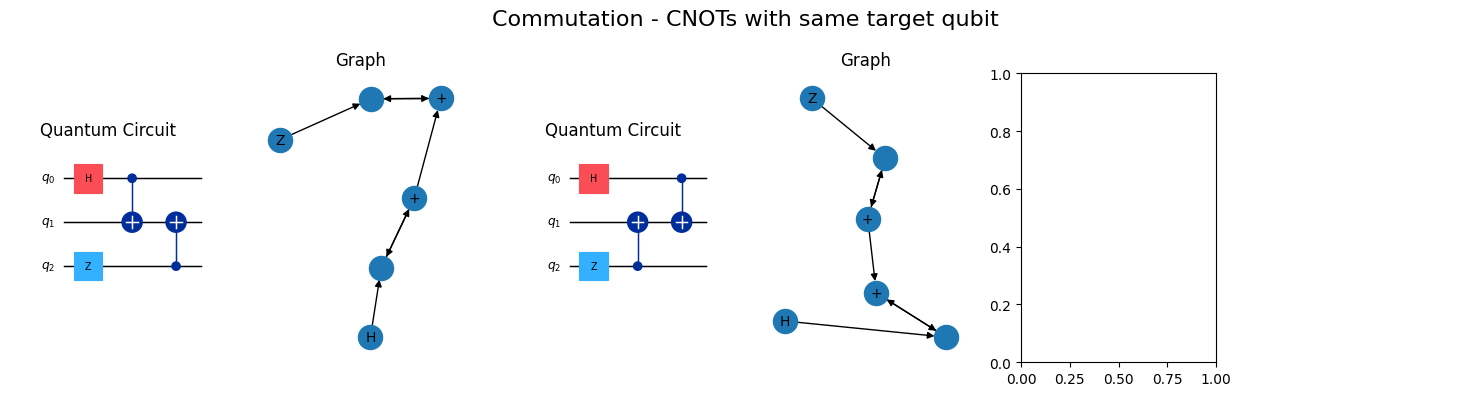

In [19]:
draw_dataset(equivalent_qcs, title='Commutation - CNOTs with same target qubit')

dataset['commutations'].append(equivalent_qcs)
equivalent_qcs = []

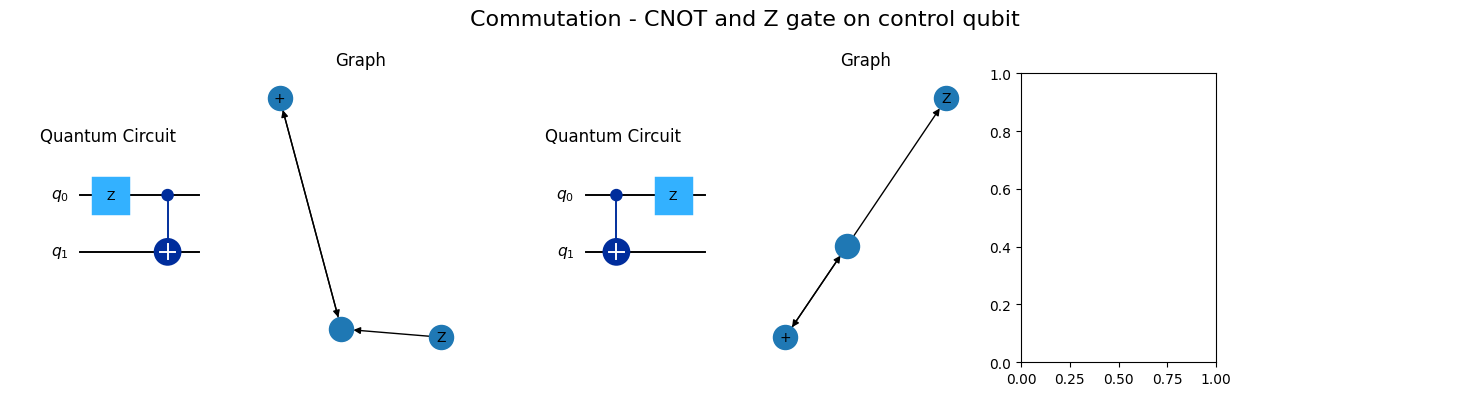

In [20]:
# CNOT and a Z gate applied to the control qubit (more in general any rotation around the Z axis)
qc_base = qiskit.QuantumCircuit(2)

qc_0 = qc_base.copy()
qc_0.z(0)
qc_0.cx(0, 1)

qcg_0 = QuantumCircuitGraph(qc_0)

qc_1 = qc_base.copy()
qc_1.cx(0, 1)
qc_1.z(0)

qcg_1 = QuantumCircuitGraph(qc_1)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))

draw_dataset(equivalent_qcs, title='Commutation - CNOT and Z gate on control qubit')
dataset['commutations'].append(equivalent_qcs)
equivalent_qcs = []

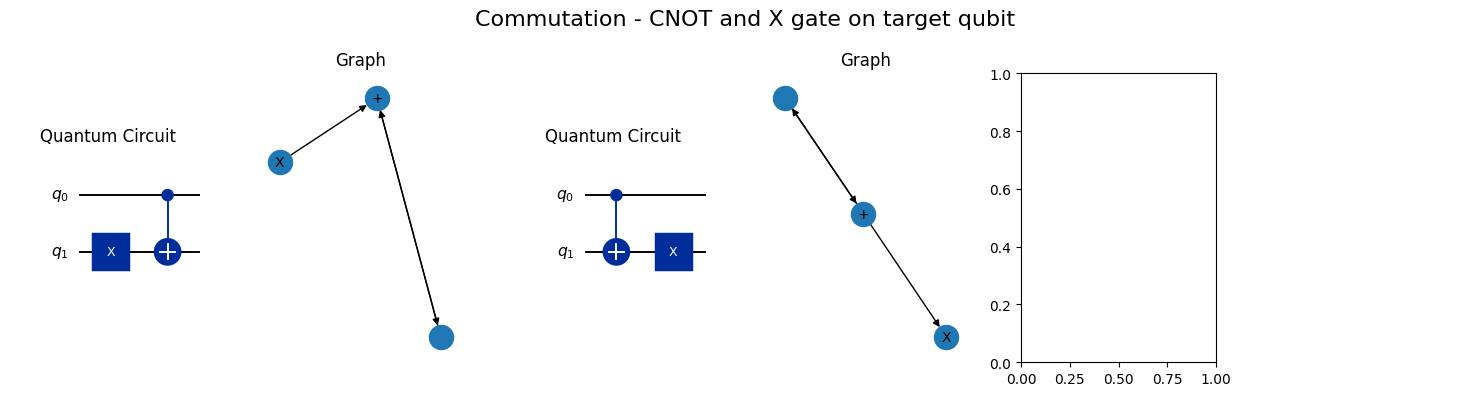

In [21]:
# CNOT and a X gate applied to the target qubit (more in general any rotation around the X axis)
qc_0 = qc_base.copy()
qc_0.x(1)
qc_0.cx(0, 1)

qcg_0 = QuantumCircuitGraph(qc_0)

qc_1 = qc_base.copy()
qc_1.cx(0, 1)
qc_1.x(1)

qcg_1 = QuantumCircuitGraph(qc_1)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))

draw_dataset(equivalent_qcs, title='Commutation - CNOT and X gate on target qubit')
dataset['commutations'].append(equivalent_qcs)
equivalent_qcs = []

## Equivalent sets of gates

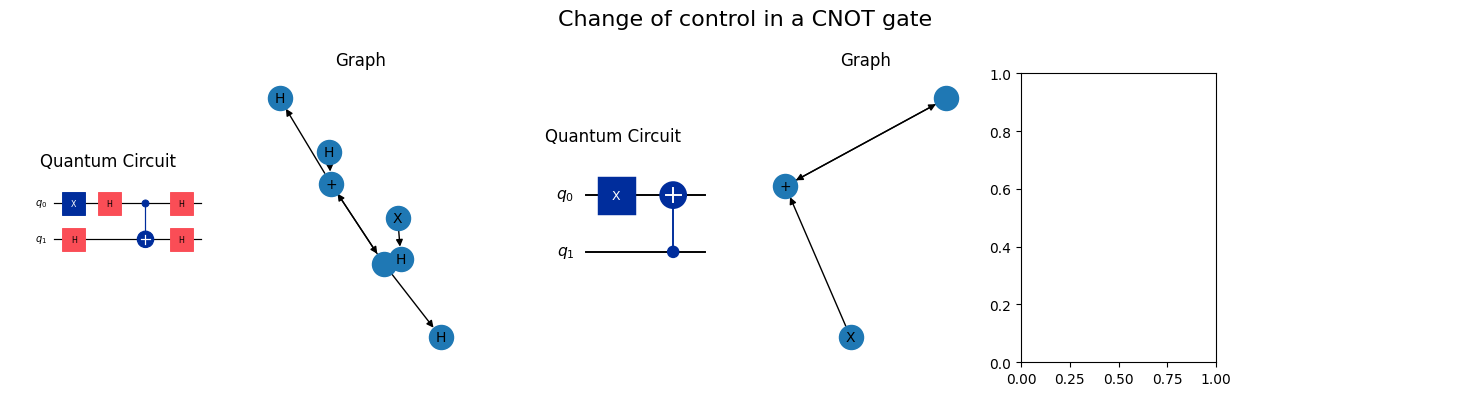

In [22]:
# Change of control in a CNOT gate
# To change the control qubit in a CNOT gate, we can use the following identity:
# CNOT_{01} = H_0 H_1 CNOT_{10} H_1 H_0
qc_base = qiskit.QuantumCircuit(2)
qc_base.x(0) # to enforce the swap between the control and target qubits

qc_0 = qc_base.copy()
qc_0.h(0)
qc_0.h(1)
qc_0.cx(0, 1)
qc_0.h(1)
qc_0.h(0)

qcg_0 = QuantumCircuitGraph(qc_0)

qc_1 = qc_base.copy()
qc_1.cx(1, 0)

qcg_1 = QuantumCircuitGraph(qc_1)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))

draw_dataset(equivalent_qcs, title='Change of control in a CNOT gate')
dataset['equivalences'] = [equivalent_qcs]
equivalent_qcs = []

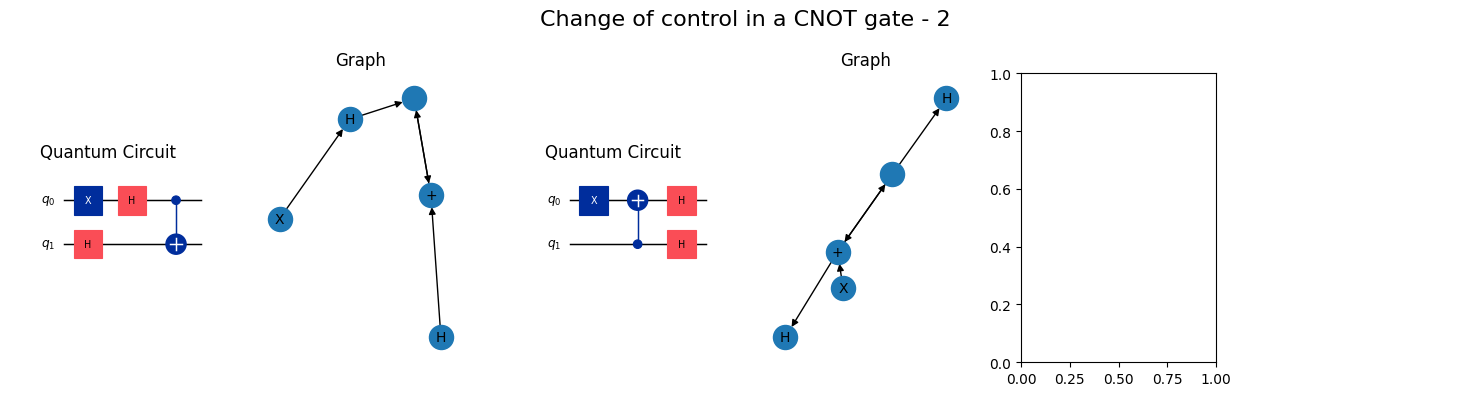

In [23]:
# Another way to change the control qubit in a CNOT gate is to use the following identity:
# H_0 H_1 CNOT_{01} = CNOT_{10} H_0 H_1

qc_base = qiskit.QuantumCircuit(2)
qc_base.x(0) 
# X to enforce the swap between the control and target qubits 
# (if the two qubits do not swap, the identity is not true, unless the two qubits are in the same state)

qc_0 = qc_base.copy()
qc_0.h(0)
qc_0.h(1)
qc_0.cx(0, 1)

qcg_0 = QuantumCircuitGraph(qc_0)

qc_1 = qc_base.copy()
qc_1.cx(1, 0)
qc_1.h(0)
qc_1.h(1)

qcg_1 = QuantumCircuitGraph(qc_1)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))

draw_dataset(equivalent_qcs, title='Change of control in a CNOT gate - 2')
dataset['equivalences'].append(equivalent_qcs)
equivalent_qcs = []

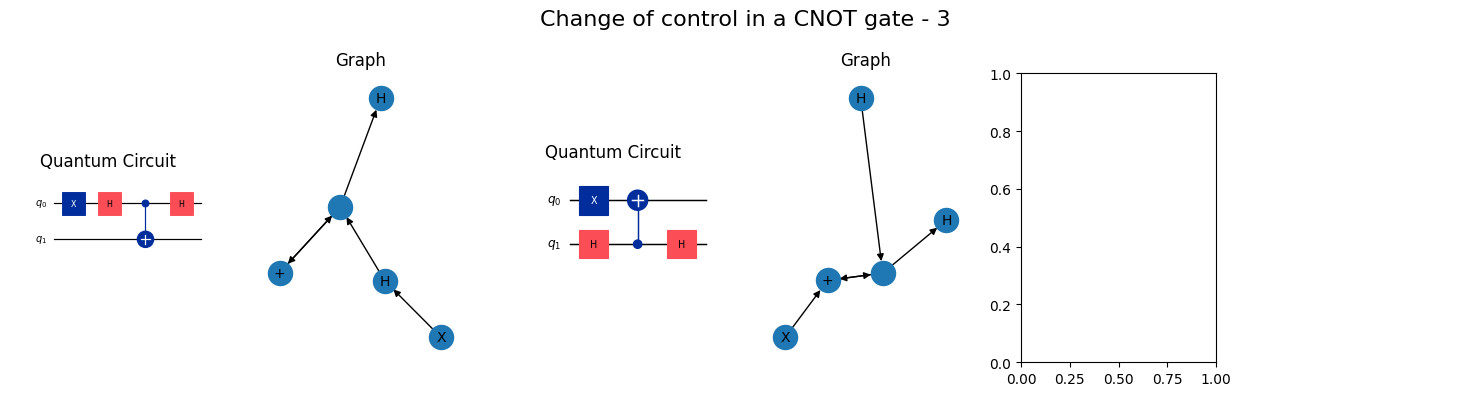

In [24]:
# Another way to change the control qubit in a CNOT gate is to use the following identity:
# H_0 CNOT_{01} H_0 = H_1 CNOT_{10} H_1

qc_base = qiskit.QuantumCircuit(2)
qc_base.x(0)

qc_0 = qc_base.copy()
qc_0.h(0)
qc_0.cx(0, 1)
qc_0.h(0)

qcg_0 = QuantumCircuitGraph(qc_0)

qc_1 = qc_base.copy()
qc_1.h(1)
qc_1.cx(1, 0)
qc_1.h(1)

qcg_1 = QuantumCircuitGraph(qc_1)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))

draw_dataset(equivalent_qcs, title='Change of control in a CNOT gate - 3')
dataset['equivalences'].append(equivalent_qcs)
equivalent_qcs = []

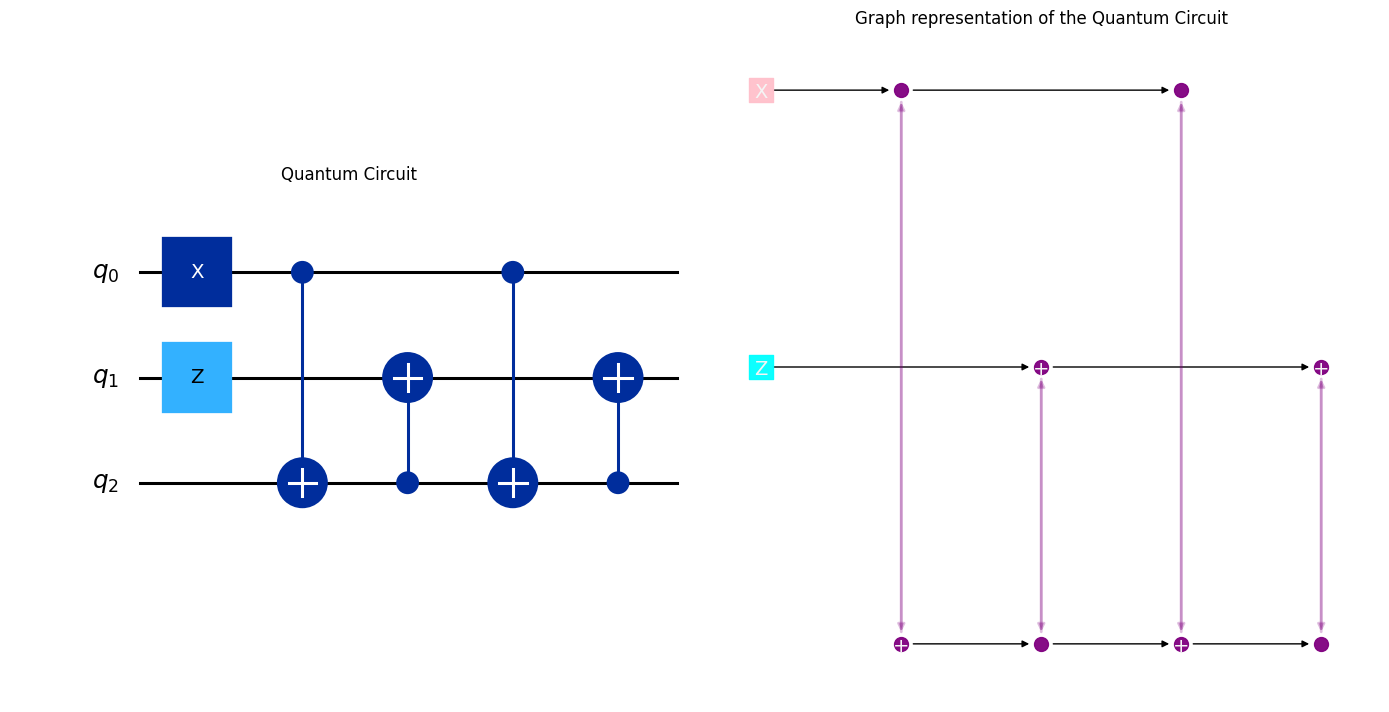

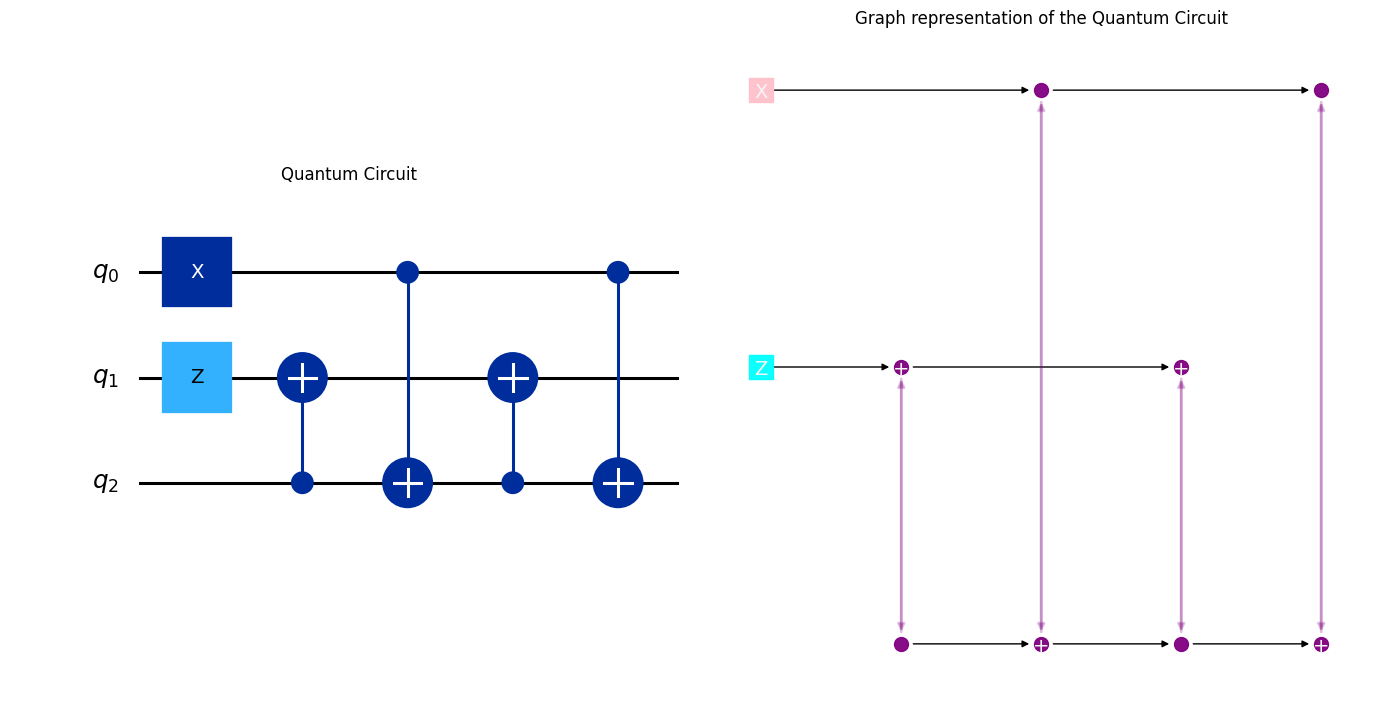

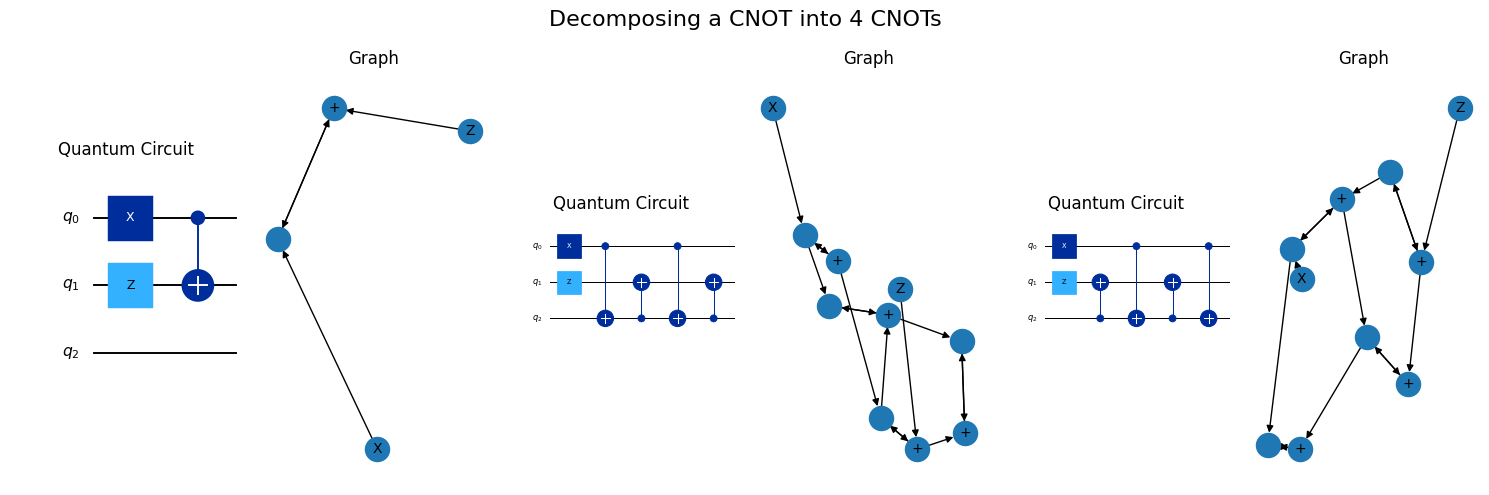

In [25]:
# Decomposing a CNOT into 4 CNOTs, using an ancilla qubit:
# CNOT_{01} = CNOT_{02} CNOT_{21} CNOT_{02} CNOT_{21}

qc_base = qiskit.QuantumCircuit(3)
qc_base.x(0)
qc_base.z(1)

qc_0 = qc_base.copy()
qc_0.cx(0, 1)

qcg_0 = QuantumCircuitGraph(qc_0)

qc_1 = qc_base.copy()
qc_1.cx(0, 2)
qc_1.cx(2, 1)
qc_1.cx(0, 2)
qc_1.cx(2, 1)

qcg_1 = QuantumCircuitGraph(qc_1)
qcg_1.draw_circuit_and_graph(circuit_like_graph=True)

# also the following circuit is equivalent to the previous one
# CNOT_{01} = CNOT_{21} CNOT_{02} CNOT_{21} CNOT_{02}
qc_2 = qc_base.copy()
qc_2.cx(2, 1)
qc_2.cx(0, 2)
qc_2.cx(2, 1)
qc_2.cx(0, 2)

qcg_2 = QuantumCircuitGraph(qc_2)
qcg_2.draw_circuit_and_graph(circuit_like_graph=True)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))
equivalent_qcs.append((qc_2, qcg_2.graph))

draw_dataset(equivalent_qcs, title='Decomposing a CNOT into 4 CNOTs')
dataset['equivalences'].append(equivalent_qcs)
equivalent_qcs = []


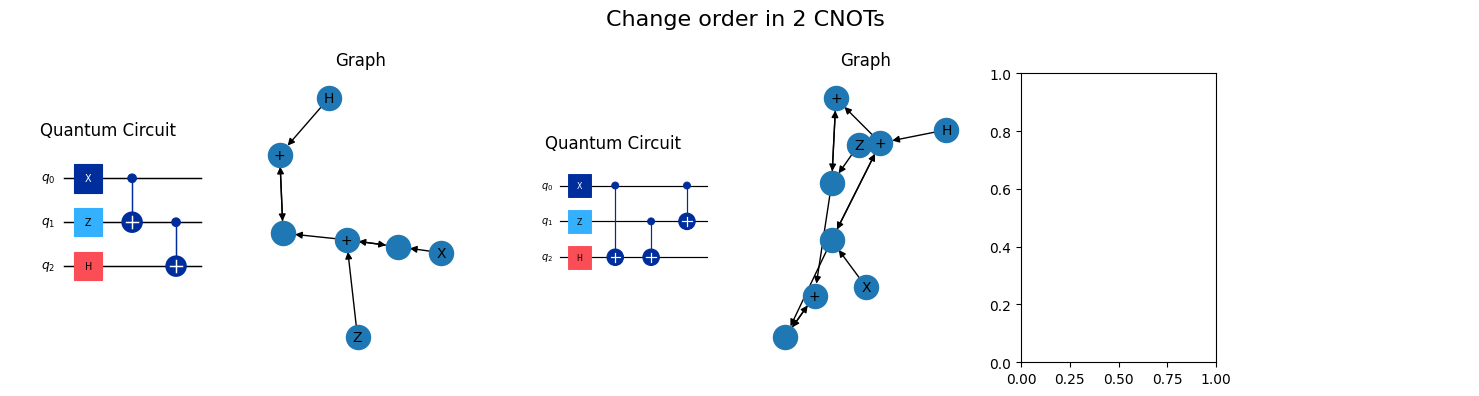

In [26]:
# Change order in 2 CNOTs having the target of the first CNOT as control of the second CNOT, using a 3rd CNOT
# CNOT_{01} CNOT_{12} = CNOT_{02} CNOT_{12} CNOT_{01}

qc_base = qiskit.QuantumCircuit(3)
qc_base.x(0)
qc_base.z(1)
qc_base.h(2)

qc_0 = qc_base.copy()
qc_0.cx(0, 1)
qc_0.cx(1, 2)

qcg_0 = QuantumCircuitGraph(qc_0)

qc_1 = qc_base.copy()
qc_1.cx(0, 2)
qc_1.cx(1, 2)
qc_1.cx(0, 1)

qcg_1 = QuantumCircuitGraph(qc_1)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))

draw_dataset(equivalent_qcs, title='Change order in 2 CNOTs')
dataset['equivalences'].append(equivalent_qcs)
equivalent_qcs = []


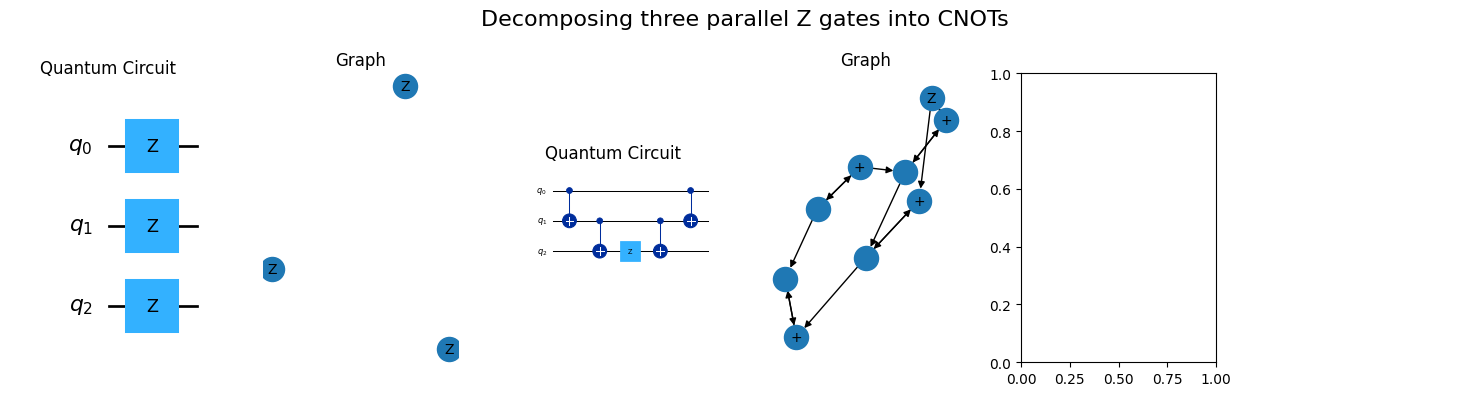

In [27]:
# Decomposing three parallel Z gates into CNOTs, using the following identity:
# Z_0 Z_1 Z_2 = CNOT_{01} CNOT_{12} Z{2} CNOT_{12} CNOT_{01}

qc_base = qiskit.QuantumCircuit(3)

qc_0 = qc_base.copy()
qc_0.z(0)
qc_0.z(1)
qc_0.z(2)
# TODO: grafi non connessi sono ok??

qcg_0 = QuantumCircuitGraph(qc_0)

qc_1 = qc_base.copy()
qc_1.cx(0, 1)
qc_1.cx(1, 2)
qc_1.z(2)
qc_1.cx(1, 2)
qc_1.cx(0, 1)

qcg_1 = QuantumCircuitGraph(qc_1)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))

draw_dataset(equivalent_qcs, title='Decomposing three parallel Z gates into CNOTs')
dataset['equivalences'].append(equivalent_qcs)
equivalent_qcs = []

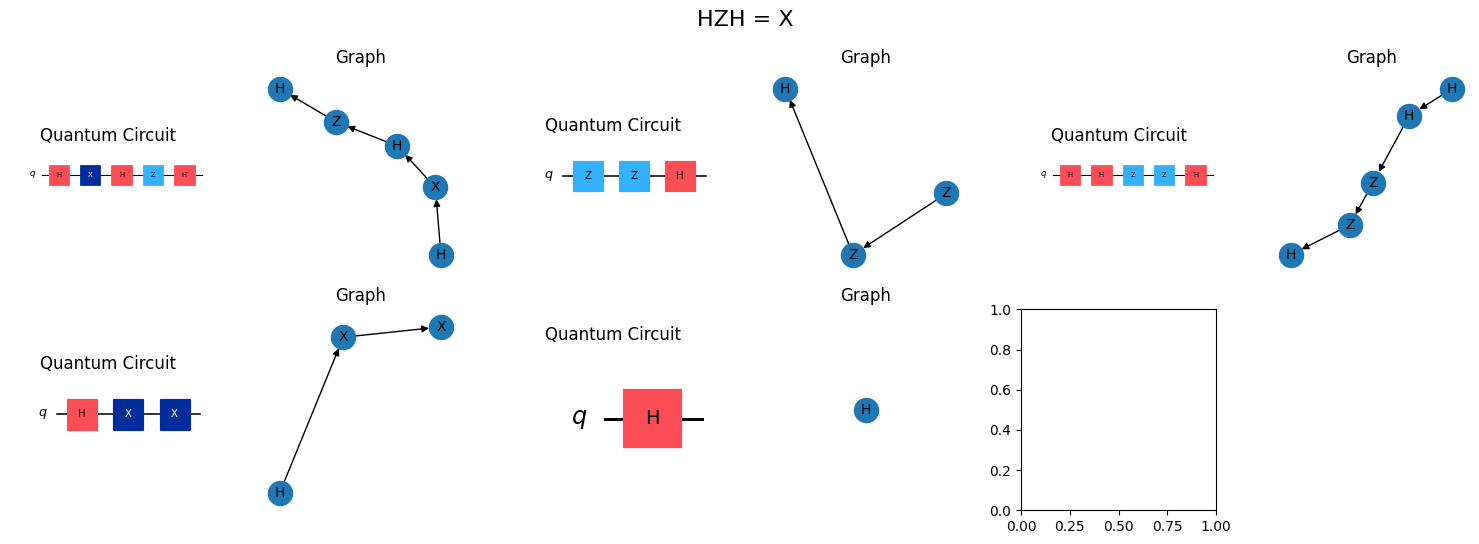

In [28]:
# HZH = X, but also HZ = XH, Z = HXH
qc_0 = qiskit.QuantumCircuit(1)
qc_0.h(0)
qc_0.x(0)
qc_0.h(0)
qc_0.z(0)
qc_0.h(0)

qcg_0 = QuantumCircuitGraph(qc_0)

qc_1 = qiskit.QuantumCircuit(1) # HXH = Z
qc_1.z(0)
qc_1.z(0)
qc_1.h(0)

qcg_1 = QuantumCircuitGraph(qc_1)

qc_2 = qiskit.QuantumCircuit(1) # XH = HZ
qc_2.h(0)
qc_2.h(0)
qc_2.z(0)
qc_2.z(0)
qc_2.h(0)

qcg_2 = QuantumCircuitGraph(qc_2)

qc_3 = qiskit.QuantumCircuit(1) # HZH = X
qc_3.h(0)
qc_3.x(0)
qc_3.x(0)

qcg_3 = QuantumCircuitGraph(qc_3)

# all these are equivalent to a single H gate
qc_4 = qiskit.QuantumCircuit(1)
qc_4.h(0)

qcg_4 = QuantumCircuitGraph(qc_4)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))
equivalent_qcs.append((qc_2, qcg_2.graph))
equivalent_qcs.append((qc_3, qcg_3.graph))
equivalent_qcs.append((qc_4, qcg_4.graph))

draw_dataset(equivalent_qcs, title='HZH = X')
dataset['equivalences'].append(equivalent_qcs)
equivalent_qcs = []

In [29]:
data_b = dataset

In [30]:
def compute_number_of_samples(dataset):
    return sum([len(sublist) for sublist in dataset])

len_null = len(data_b['null_ops'])
len_commutations = compute_number_of_samples(data_b['commutations'])
len_equivalences = compute_number_of_samples(data_b['equivalences'])

print(f'Number of null operations: {len_null}')
print(f'Number of commutations: {len_commutations}')
print(f'Number of equivalences: {len_equivalences}')
print(f'Total number of quantum circuits: {len_null + len_commutations + len_equivalences}')

Number of null operations: 18
Number of commutations: 8
Number of equivalences: 18
Total number of quantum circuits: 44


In [31]:
len_null = len(data_b['null_ops'])
len_commutations = len(data_b['commutations'])
len_equivalences = len(data_b['equivalences'])

print(f'Total number of samples (equivalence classes): {len_null + len_commutations + len_equivalences}')

Total number of samples (equivalence classes): 29


In [32]:
dataset_basic = dataset

# export the dataset
import pickle
with open('dataset_basic.pkl', 'wb') as f:
    pickle.dump(dataset_basic, f)

# now we can load the dataset with the following command
# with open('Data/dataset_basic.pkl', 'rb') as f:
#    dataset = pickle.load(f)

# Dataset creation

In [33]:
dataset = {
    'basic': dataset_basic,
    'combined': []
    }

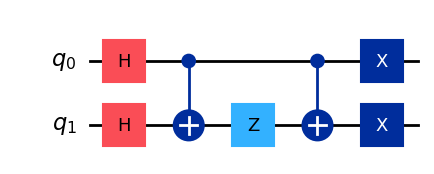

In [34]:
# SAMPLE 1
sample = []

qc = qiskit.QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0, 1)
qc.z(1)
qc.cx(0, 1)
qc.x(0)
qc.x(1)

qcg = QuantumCircuitGraph(qc)
sample.append((qc, qcg.graph))

qc.draw(output='mpl')

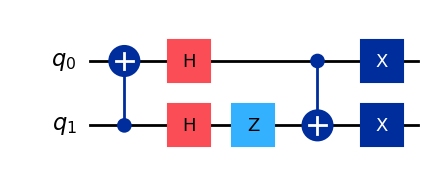

In [35]:
# swap the control and target qubits
qc_1 = qiskit.QuantumCircuit(2)
qc_1.cx(1,0)
qc_1.h(0)
qc_1.h(1)
qc_1.z(1)
qc_1.cx(0, 1)
qc_1.x(0)
qc_1.x(1)

qcg_1 = QuantumCircuitGraph(qc_1)

qc_1.draw(output='mpl')

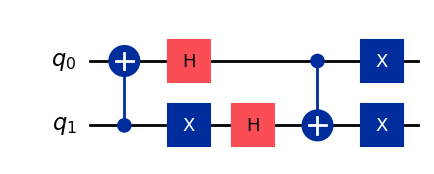

In [36]:
# swap the control and target qubits + HZ = XH
qc_2 = qiskit.QuantumCircuit(2)
qc_2.cx(1,0)
qc_2.h(0)
qc_2.x(1)
qc_2.h(1)
qc_2.cx(0, 1)
qc_2.x(0)
qc_2.x(1)

qcg_2 = QuantumCircuitGraph(qc_2)

qc_2.draw(output='mpl')

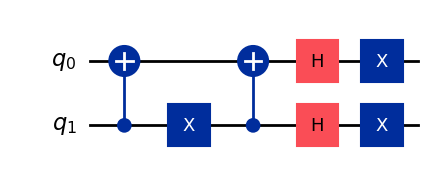

In [37]:
# 2 times swap the control and target qubits + HZ = XH
qc_3 = qiskit.QuantumCircuit(2)
qc_3.cx(1,0)
qc_3.x(1)
qc_3.cx(1, 0)
qc_3.h(0)
qc_3.h(1)
qc_3.x(0)
qc_3.x(1)

qcg_3 = QuantumCircuitGraph(qc_3)

qc_3.draw(output='mpl')

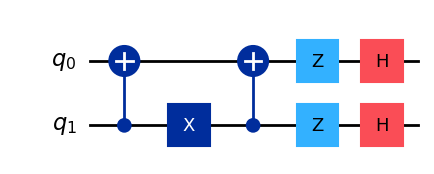

In [38]:
# 2 times swap the control and target qubits + HZ = XH + HX = ZH
qc_4 = qiskit.QuantumCircuit(2)
qc_4.cx(1,0)
qc_4.x(1)
qc_4.cx(1, 0)
qc_4.z(0)
qc_4.z(1)
qc_4.h(0)
qc_4.h(1)

qcg_4 = QuantumCircuitGraph(qc_4)

qc_4.draw(output='mpl')

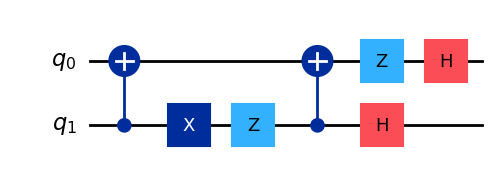

In [39]:
# [...] + CNOT and Z gate on control qubit commute
qc_5 = qiskit.QuantumCircuit(2)
qc_5.cx(1,0)
qc_5.x(1)
qc_5.z(1)
qc_5.cx(1, 0)
qc_5.z(0)
qc_5.h(0)
qc_5.h(1)

qcg_5 = QuantumCircuitGraph(qc_5)

qc_5.draw(output='mpl')

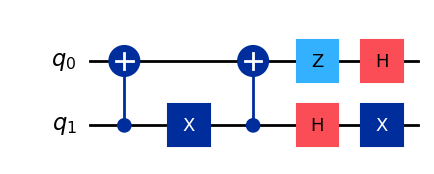

In [40]:
qc_6 = qiskit.QuantumCircuit(2)
qc_6.cx(1,0)
qc_6.x(1)
qc_6.cx(1, 0)
qc_6.z(0)
qc_6.h(0)
qc_6.h(1)
qc_6.x(1)

qcg_6 = QuantumCircuitGraph(qc_6)

qc_6.draw(output='mpl')

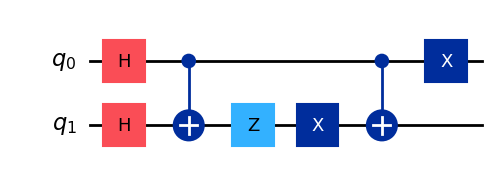

In [41]:
# CNOT and X gate on target qubit commute
qc_7 = qiskit.QuantumCircuit(2)
qc_7.h(0)
qc_7.h(1)
qc_7.cx(0, 1)
qc_7.z(1)
qc_7.x(1)
qc_7.cx(0, 1)
qc_7.x(0)

qcg_7 = QuantumCircuitGraph(qc_7)

qc_7.draw(output='mpl')

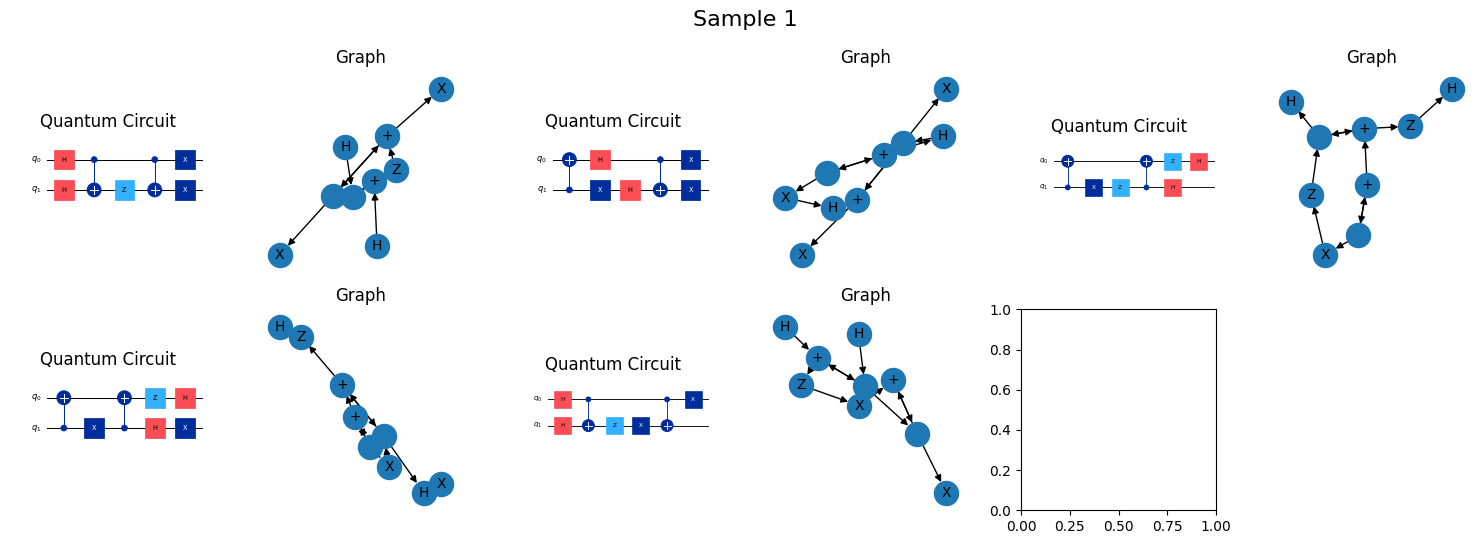

In [42]:
sample = [
    (qc, qcg.graph),
    (qc_2, qcg_2.graph),
    (qc_5, qcg_5.graph),
    (qc_6, qcg_6.graph),
    (qc_7, qcg_7.graph)
]

draw_dataset(sample, title='Sample 1')
dataset['combined'].append(sample)

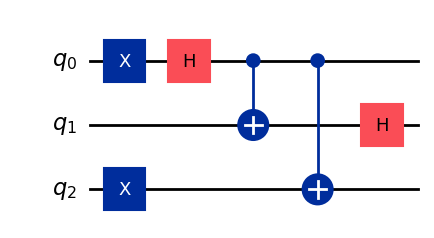

In [43]:
# SAMPLE 2
sample = []

qc = qiskit.QuantumCircuit(3)
qc.x(0)
qc.x(2)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.h(1)

qcg = QuantumCircuitGraph(qc)
sample.append((qc, qcg.graph))

qc.draw(output='mpl')

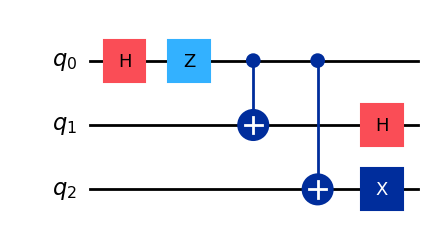

In [44]:
# XH = HZ + CNOT and X on target commute
qc_1 = qiskit.QuantumCircuit(3)
qc_1.h(0)
qc_1.z(0)
qc_1.cx(0, 1)
qc_1.cx(0, 2)
qc_1.h(1)
qc_1.x(2)

qcg_1 = QuantumCircuitGraph(qc_1)

qc_1.draw(output='mpl')

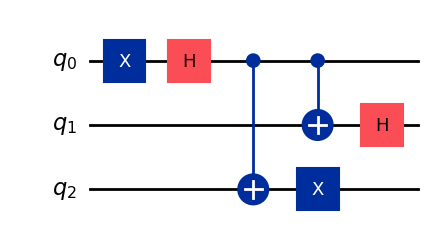

In [45]:
# CNOT with same control commute + CNOT and X on target commute
qc_2 = qiskit.QuantumCircuit(3)
qc_2.x(0)
qc_2.h(0)
qc_2.cx(0, 2)
qc_2.x(2)
qc_2.cx(0, 1)
qc_2.h(1)

qcg_2 = QuantumCircuitGraph(qc_2)

qc_2.draw(output='mpl')

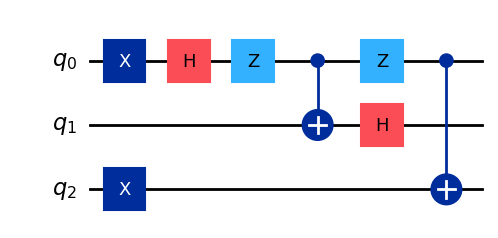

In [46]:
# add consecutive Z gates + CNOT and Z on control commute
qc_3 = qiskit.QuantumCircuit(3)
qc_3.x(0)
qc_3.x(2)
qc_3.h(0)
qc_3.z(0)
qc_3.cx(0, 1)
qc_3.z(0)
qc_3.cx(0, 2)
qc_3.h(1)

qcg_3 = QuantumCircuitGraph(qc_3)

qc_3.draw(output='mpl')

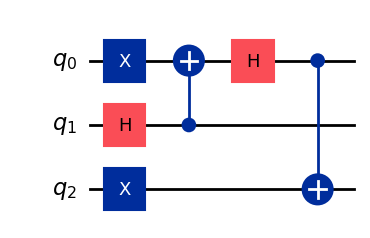

In [47]:
# swap control and target qubits in a CNOT + double H is identity
qc_4 = qiskit.QuantumCircuit(3)
qc_4.x(0)
qc_4.x(2)
qc_4.h(1)
qc_4.cx(1, 0)
qc_4.h(0)
qc_4.cx(0, 2)

qcg_4 = QuantumCircuitGraph(qc_4)

qc_4.draw(output='mpl')

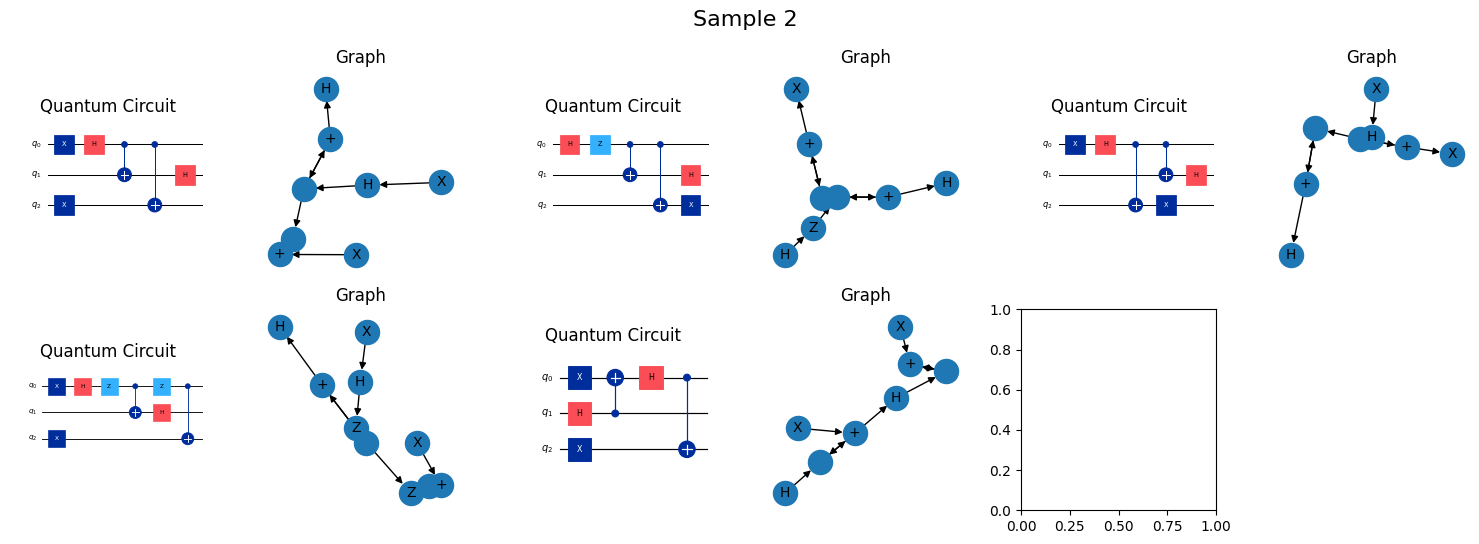

In [48]:
sample = [
    (qc, qcg.graph),
    (qc_1, qcg_1.graph), 
    (qc_2, qcg_2.graph), 
    (qc_3, qcg_3.graph), 
    (qc_4, qcg_4.graph)
    ]

draw_dataset(sample, title='Sample 2')

dataset['combined'].append(sample)

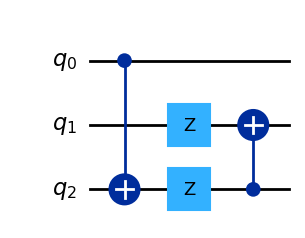

In [49]:
# SAMPLE 3
qc = qiskit.QuantumCircuit(3)
qc.cx(0, 2)
qc.z(1)
qc.z(2)
qc.cx(2,1)


qcg = QuantumCircuitGraph(qc)

qc.draw(output='mpl')

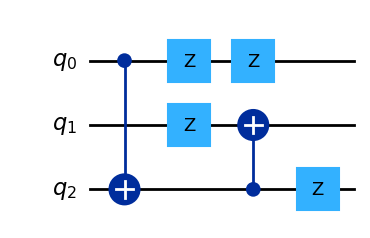

In [50]:
# CNOT and Z on control commute + double Z is identity
qc_1 = qiskit.QuantumCircuit(3)
qc_1.cx(0, 2)
qc_1.z(0)
qc_1.z(0)
qc_1.z(1)
qc_1.cx(2,1)
qc_1.z(2)

qcg_1 = QuantumCircuitGraph(qc_1)

qc_1.draw(output='mpl')

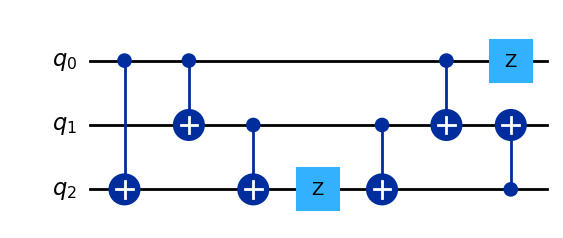

In [51]:
# double Z is identity + 3 parallel Z gates as CNOTs
qc_2 = qiskit.QuantumCircuit(3)
qc_2.cx(0, 2)

qc_2.cx(0, 1)
qc_2.cx(1, 2)
qc_2.z(2)
qc_2.cx(1, 2)
qc_2.cx(0, 1)

qc_2.z(0)
qc_2.cx(2,1)


qcg_2 = QuantumCircuitGraph(qc_2)

qc_2.draw(output='mpl')

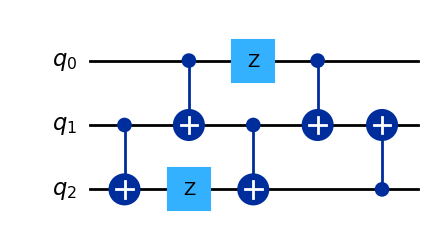

In [52]:
# qc_2 + change order in 2 CNOTs + CNOT and Z on control commute
qc_3 = qiskit.QuantumCircuit(3)
qc_3.cx(1, 2)
qc_3.cx(0, 1)
qc_3.z(2)
qc_3.z(0)
qc_3.cx(1, 2)
qc_3.cx(0, 1)
qc_3.cx(2,1)


qcg_3 = QuantumCircuitGraph(qc_3)

qc_3.draw(output='mpl')

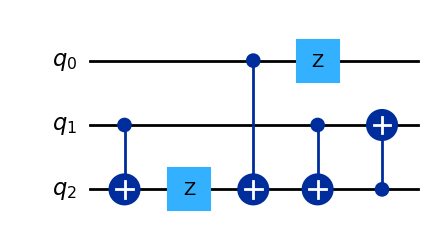

In [53]:
# qc_3 + change order in 2 CNOTs + CNOT with same control commute + double CNOT is identity
qc_4 = qiskit.QuantumCircuit(3)
qc_4.cx(1, 2)
qc_4.z(2)
qc_4.cx(0, 2)
qc_4.cx(1, 2)

qc_4.z(0)
qc_4.cx(2,1)


qcg_4 = QuantumCircuitGraph(qc_4)

qc_4.draw(output='mpl')

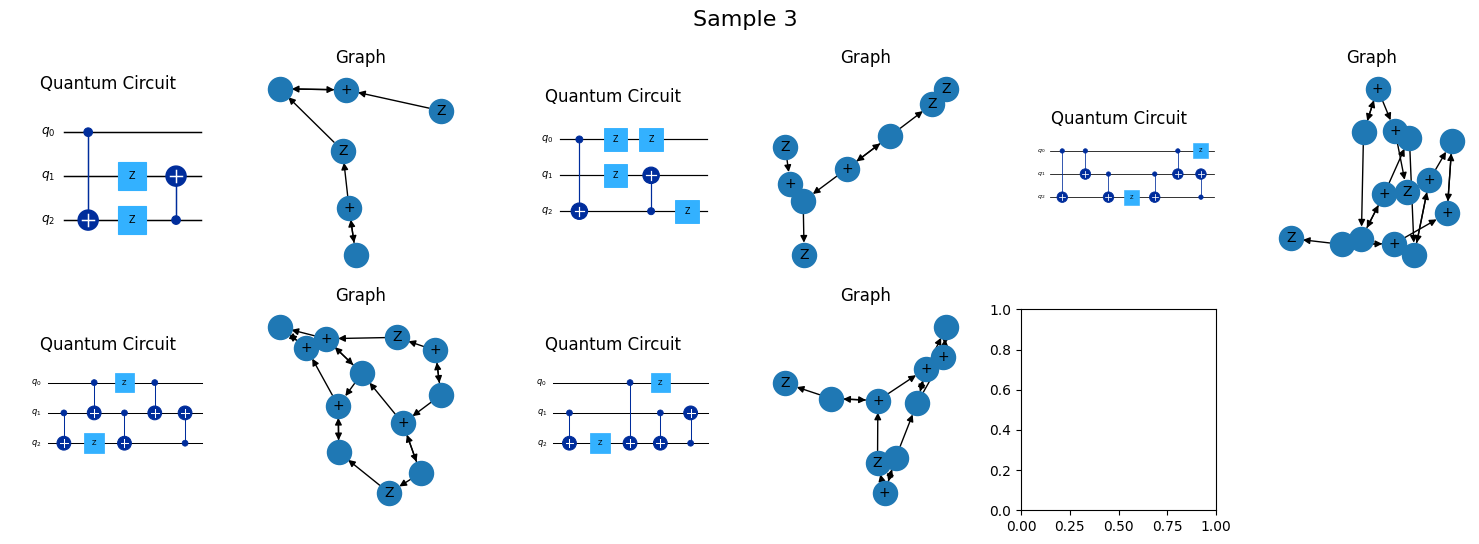

In [54]:
sample = [
    (qc, qcg.graph),
    (qc_1, qcg_1.graph), 
    (qc_2, qcg_2.graph), 
    (qc_3, qcg_3.graph), 
    (qc_4, qcg_4.graph)
    ]

draw_dataset(sample, title='Sample 3')

dataset['combined'].append(sample)

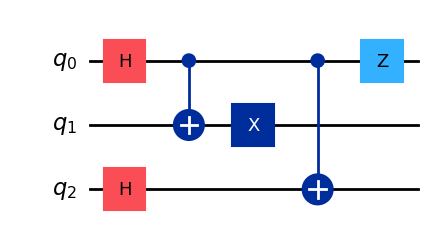

In [55]:
# SAMPLE 4
qc = qiskit.QuantumCircuit(3)
qc.h(0)
qc.h(2)
qc.cx(0, 1)
qc.x(1)
qc.cx(0, 2)
qc.z(0)

qcg = QuantumCircuitGraph(qc)

qc.draw(output='mpl')

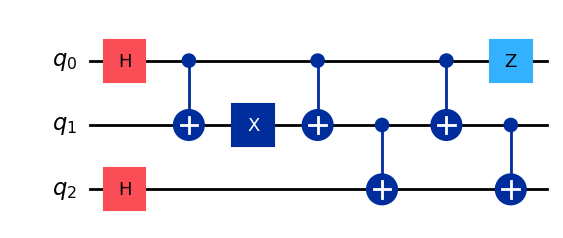

In [56]:
# decompose CNOT using ancilla
qc_1 = qiskit.QuantumCircuit(3)
qc_1.h(0)
qc_1.h(2)
qc_1.cx(0, 1)
qc_1.x(1)

qc_1.cx(0, 1)
qc_1.cx(1, 2)
qc_1.cx(0, 1)
qc_1.cx(1, 2)

qc_1.z(0)

qcg_1 = QuantumCircuitGraph(qc_1)

qc_1.draw(output='mpl')

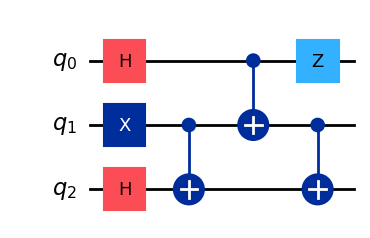

In [57]:
# qc_1 + CNOT and X on target commute + double CNOT is identity
qc_2 = qiskit.QuantumCircuit(3)

qc_2.h(0)
qc_2.h(2)
qc_2.x(1)
qc_2.cx(1, 2)
qc_2.cx(0, 1)
qc_2.cx(1, 2)
qc_2.z(0)

qcg_2 = QuantumCircuitGraph(qc_2)

qc_2.draw(output='mpl')

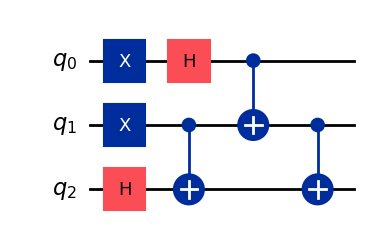

In [58]:
# qc_2 + CNOT and Z on control commute + HZ = XH
qc_3 = qiskit.QuantumCircuit(3)
qc_3.x(0)
qc_3.h(0)
qc_3.h(2)
qc_3.x(1)
qc_3.cx(1, 2)
qc_3.cx(0, 1)
qc_3.cx(1, 2)

qcg_3 = QuantumCircuitGraph(qc_3)

qc_3.draw(output='mpl')


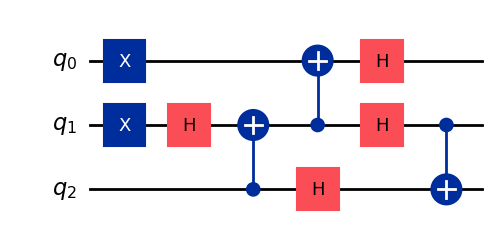

In [59]:
# swap control and target qubits in a CNOT + double H is identity
qc_4 = qiskit.QuantumCircuit(3)

qc_4.x(0)
qc_4.x(1)
qc_4.h(1)
qc_4.cx(2, 1)
qc_4.h(2)
qc_4.cx(1, 0)
qc_4.h(0)
qc_4.h(1)
qc_4.cx(1, 2)

qcg_4 = QuantumCircuitGraph(qc_4)

qc_4.draw(output='mpl')

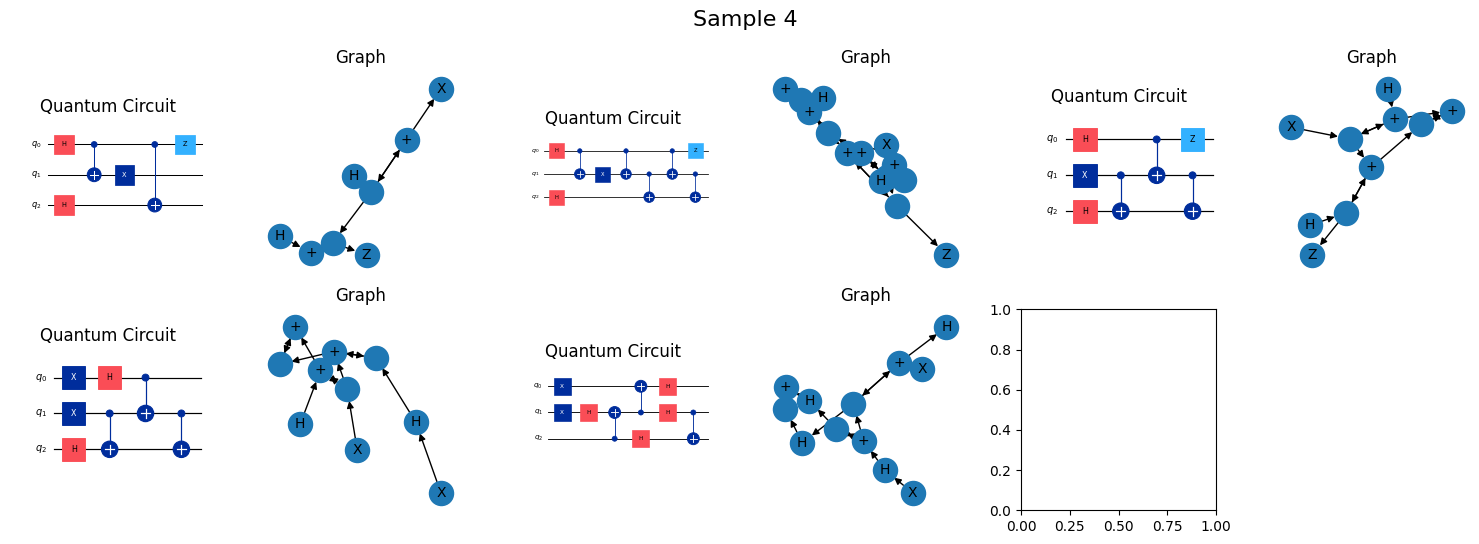

In [60]:
sample = [
    (qc, qcg.graph),
    (qc_1, qcg_1.graph), 
    (qc_2, qcg_2.graph), 
    (qc_3, qcg_3.graph), 
    (qc_4, qcg_4.graph)
    ]

draw_dataset(sample, title='Sample 4')

dataset['combined'].append(sample)

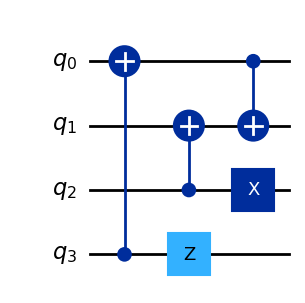

In [61]:
# SAMPLE 5
qc = qiskit.QuantumCircuit(4)
qc.cx(3,0)
qc.cx(2,1)
qc.z(3)
qc.x(2)
qc.cx(0,1)

qcg = QuantumCircuitGraph(qc)

qc.draw(output='mpl')

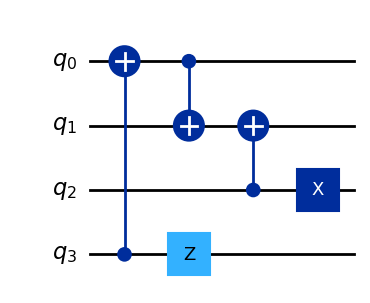

In [62]:
# CNOTs with same target commute
qc_1 = qiskit.QuantumCircuit(4)
qc_1.cx(3,0)
qc_1.cx(0,1)
qc_1.cx(2,1)
qc_1.z(3)
qc_1.x(2)

qcg_1 = QuantumCircuitGraph(qc_1)

qc_1.draw(output='mpl')

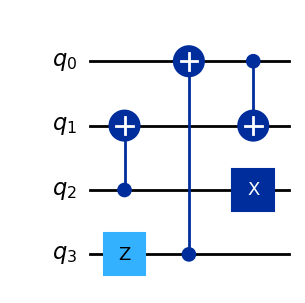

In [63]:
# CNOT and Z on control commute
qc_2 = qiskit.QuantumCircuit(4)

qc_2.z(3)
qc_2.cx(3,0)
qc_2.cx(2,1)
qc_2.x(2)
qc_2.cx(0,1)

qcg_2 = QuantumCircuitGraph(qc_2)

qc_2.draw(output='mpl')

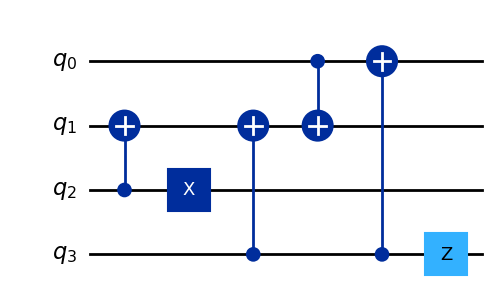

In [64]:
# change order in 2 CNOTs 
qc_3 = qiskit.QuantumCircuit(4)
qc_3.cx(2,1)
qc_3.x(2)
qc_3.cx(3,1)
qc_3.cx(0,1)
qc_3.cx(3,0)
qc_3.z(3)


qcg_3 = QuantumCircuitGraph(qc_3)

qc_3.draw(output='mpl')

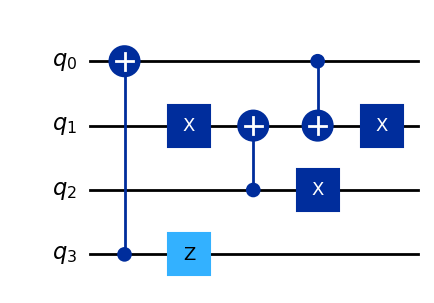

In [65]:
# double X is identity + CNOT and X on target commute
qc_4 = qiskit.QuantumCircuit(4)
qc_4.cx(3,0)
qc_4.x(1)
qc_4.cx(2,1)
qc_4.z(3)
qc_4.x(2)
qc_4.cx(0,1)
qc_4.x(1)

qcg_4 = QuantumCircuitGraph(qc_4)

qc_4.draw(output='mpl')

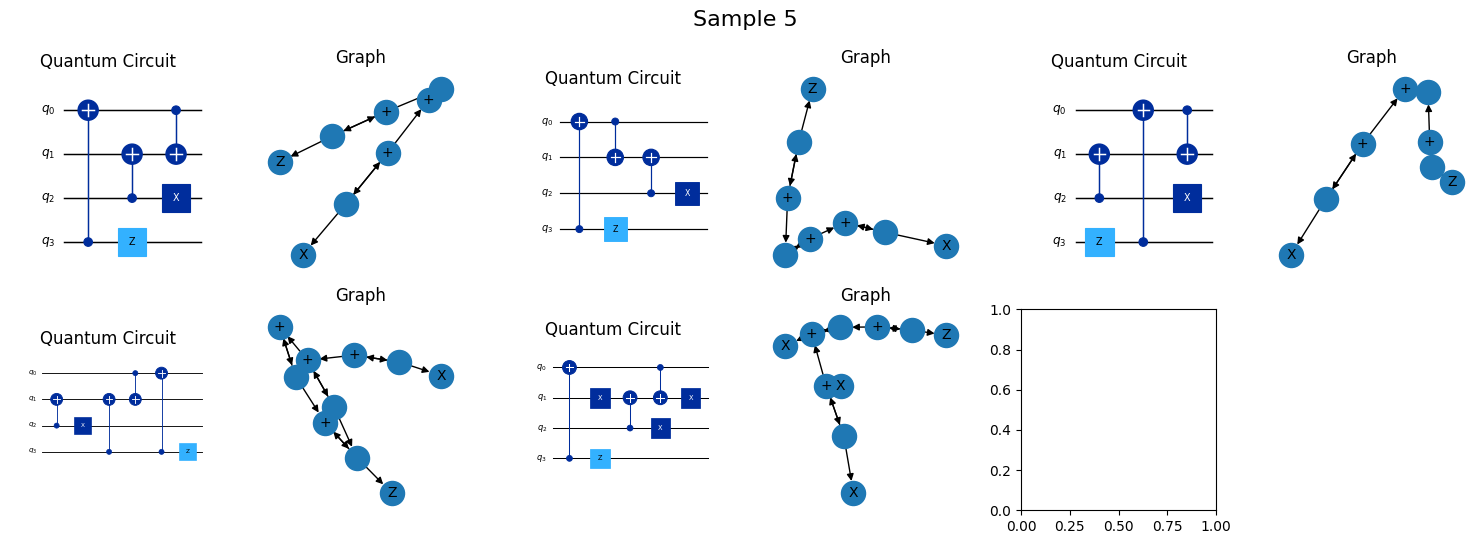

In [66]:
sample = [
    (qc, qcg.graph),
    (qc_1, qcg_1.graph), 
    (qc_2, qcg_2.graph), 
    (qc_3, qcg_3.graph), 
    (qc_4, qcg_4.graph)
    ]

draw_dataset(sample, title='Sample 5')

dataset['combined'].append(sample)


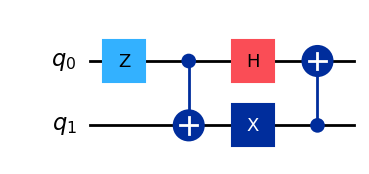

In [67]:
# SAMPLE 6
qc = qiskit.QuantumCircuit(2)
qc.z(0)
qc.cx(0, 1)
qc.h(0)
qc.x(1)
qc.cx(1, 0)

qcg = QuantumCircuitGraph(qc)

qc.draw(output='mpl')


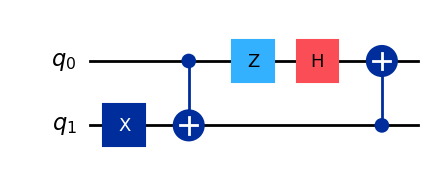

In [68]:
# CNOT and Z on control commute + CNOT and X on target commute
qc_1 = qiskit.QuantumCircuit(2)
qc_1.x(1)
qc_1.cx(0, 1)
qc_1.z(0)
qc_1.h(0)
qc_1.cx(1, 0)

qcg_1 = QuantumCircuitGraph(qc_1)

qc_1.draw(output='mpl')

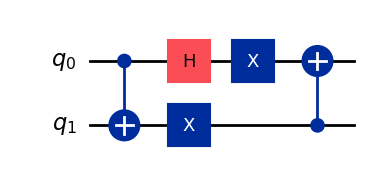

In [69]:
# CNOT and Z on control commute + ZH = HX
qc_2 = qiskit.QuantumCircuit(2)
qc_2.cx(0, 1)
qc_2.h(0)
qc_2.x(0)
qc_2.x(1)
qc_2.cx(1, 0)

qcg_2 = QuantumCircuitGraph(qc_2)

qc_2.draw(output='mpl')

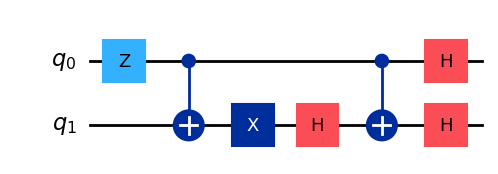

In [70]:
# change of control in a CNOT gate (3) + double H is identity
qc_3 = qiskit.QuantumCircuit(2)
qc_3.z(0)
qc_3.cx(0, 1)
qc_3.x(1)
qc_3.h(1)
qc_3.cx(0, 1)
qc_3.h(0)
qc_3.h(1)

qcg_3 = QuantumCircuitGraph(qc_3)

qc_3.draw(output='mpl')

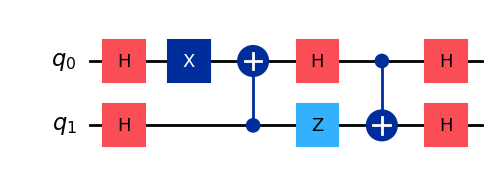

In [71]:
# qc_3 + change of control in a CNOT gate (3) + double H is identity
qc_4 = qiskit.QuantumCircuit(2)
qc_4.h(0)
qc_4.x(0)
qc_4.h(1)
qc_4.cx(1, 0)
qc_4.h(0)
qc_4.z(1)
qc_4.cx(0, 1)
qc_4.h(0)
qc_4.h(1)

qcg_4 = QuantumCircuitGraph(qc_4)

qc_4.draw(output='mpl')

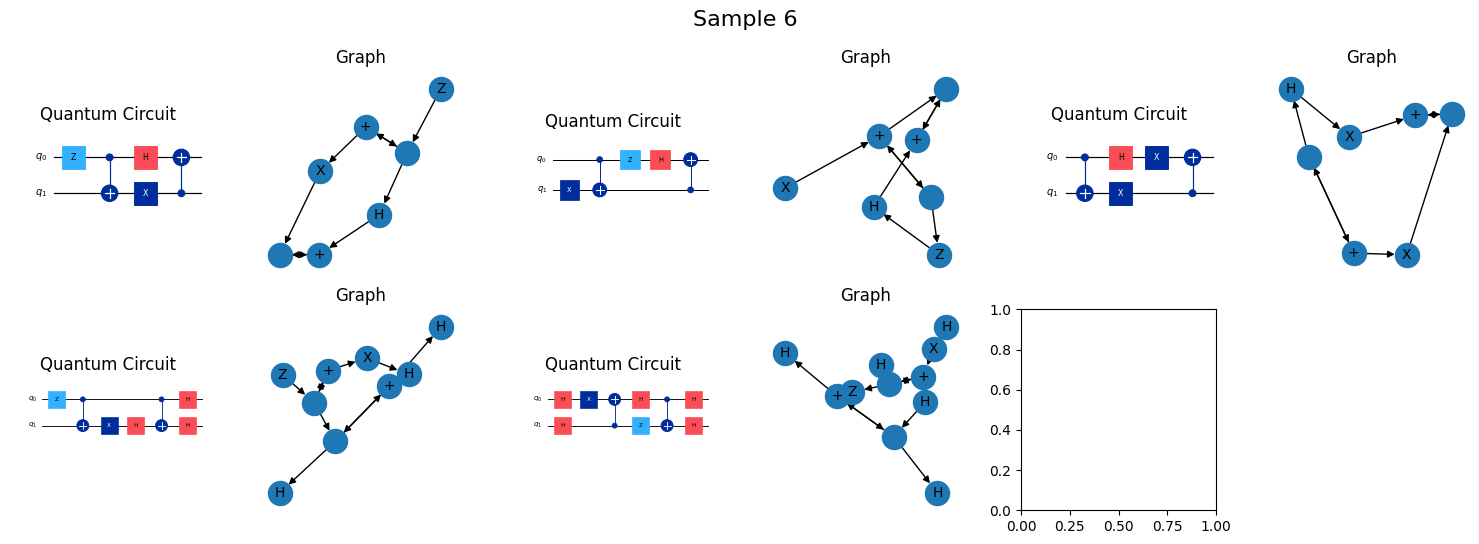

In [72]:
sample = [
    (qc, qcg.graph),
    (qc_1, qcg_1.graph), 
    (qc_2, qcg_2.graph), 
    (qc_3, qcg_3.graph), 
    (qc_4, qcg_4.graph)
    ]

draw_dataset(sample, title='Sample 6')

dataset['combined'].append(sample)

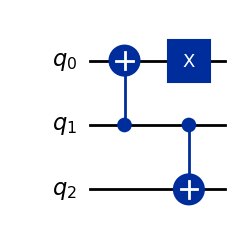

In [73]:
# SAMPLE 7
qc = qiskit.QuantumCircuit(3)
qc.cx(1,0)
qc.cx(1,2)
qc.x(0)

qcg = QuantumCircuitGraph(qc)

qc.draw(output='mpl')

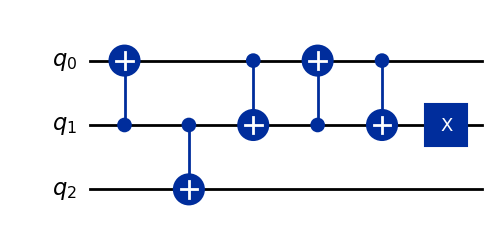

In [74]:
# swap with cnot
qc_1 = qiskit.QuantumCircuit(3)
qc_1.cx(1,0)
qc_1.cx(1,2)
qc_1.cx(0,1)
qc_1.cx(1,0)
qc_1.cx(0,1)
qc_1.x(1)

qcg_1 = QuantumCircuitGraph(qc_1)

qc_1.draw(output='mpl')

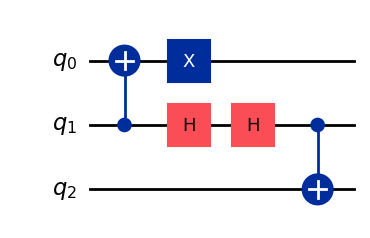

In [75]:
# double H is identity
qc_2 = qiskit.QuantumCircuit(3)
qc_2.cx(1,0)
qc_2.h(1)
qc_2.h(1)
qc_2.cx(1,2)
qc_2.x(0)

qcg_2 = QuantumCircuitGraph(qc_2)

qc_2.draw(output='mpl')

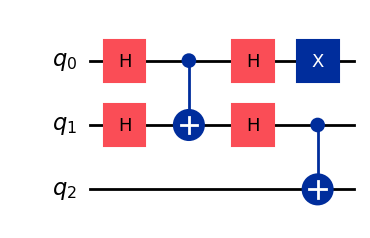

In [76]:
# double H is identity + change of control in a CNOT gate
qc_3 = qiskit.QuantumCircuit(3)
qc_3.h(0)
qc_3.h(1)
qc_3.cx(0,1)
qc_3.h(0)
qc_3.h(1)
qc_3.cx(1,2)
qc_3.x(0)

qcg_3 = QuantumCircuitGraph(qc_3)

qc_3.draw(output='mpl')

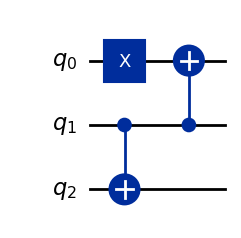

In [77]:
# CNOT and X on target commute + CNOTs with same control commute
qc_4 = qiskit.QuantumCircuit(3)
qc_4.x(0)
qc_4.cx(1,2)
qc_4.cx(1,0)

qcg_4 = QuantumCircuitGraph(qc_4)

qc_4.draw(output='mpl')


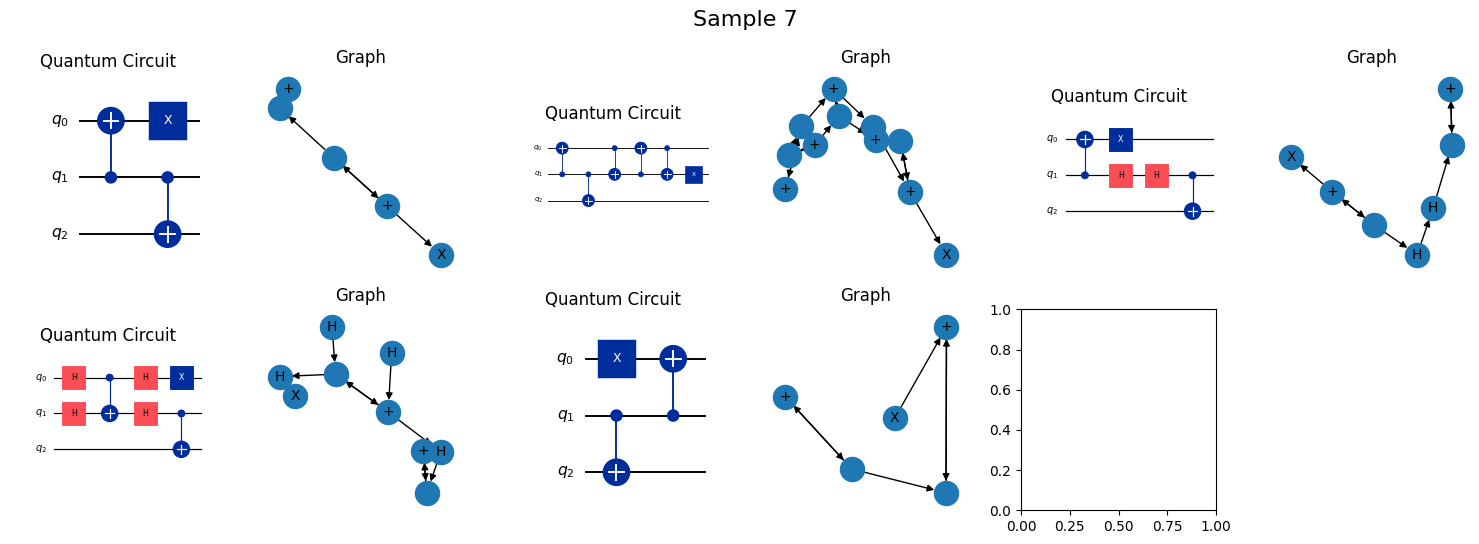

In [78]:
sample = [
    (qc, qcg.graph),
    (qc_1, qcg_1.graph), 
    (qc_2, qcg_2.graph), 
    (qc_3, qcg_3.graph), 
    (qc_4, qcg_4.graph)
    ]

draw_dataset(sample, title='Sample 7')

dataset['combined'].append(sample)

In [79]:
len(dataset['combined'])

7

In [80]:
# save dataset
with open('dataset_composite.pkl', 'wb') as f:
    pickle.dump(dataset['combined'], f)

with open('dataset.pkl', 'wb') as f:
    pickle.dump(dataset, f)

In [81]:
list(qcg_4.graph.nodes)

['x_0_6', 'cx_1_control_7', 'cx_2_target_7', 'cx_1_control_8', 'cx_0_target_8']

In [82]:
qcg_4.node_ids

['x_0_6', 'cx_1_control_7', 'cx_2_target_7', 'cx_0_target_8', 'cx_1_control_8']

In [83]:
node_mapping = {}

for node_id in qcg_4.node_ids:
            # find the index of the node in the nodes of the graph
            node_idx = list(qcg_4.graph.nodes).index(node_id)
            node_mapping[node_id] = node_idx

In [84]:
qcg_4.graph.nodes(data=True)

NodeDataView({'x_0_6': {'type': 'x', 'qubit': 0, 'params': [], 'feature_vector': array([0, 0, 1, 0, 0, 0])}, 'cx_1_control_7': {'type': 'cx', 'qubit': 1, 'params': [], 'ctrl_trgt': 'c', 'feature_vector': array([1, 0, 0, 0, 1, 0])}, 'cx_2_target_7': {'type': 'cx', 'qubit': 2, 'params': [], 'ctrl_trgt': 't', 'feature_vector': array([1, 0, 0, 0, 0, 1])}, 'cx_1_control_8': {'type': 'cx', 'qubit': 1, 'params': [], 'ctrl_trgt': 'c', 'feature_vector': array([1, 0, 0, 0, 1, 0])}, 'cx_0_target_8': {'type': 'cx', 'qubit': 0, 'params': [], 'ctrl_trgt': 't', 'feature_vector': array([1, 0, 0, 0, 0, 1])}})

In [85]:
from networkx import get_node_attributes, adjacency_matrix

graph = qcg_4.graph

feature_vectors = [graph.nodes[node]['feature_vector'] for node in graph.nodes()]

# Convert to NumPy array
attr_matrix = np.array(feature_vectors)

adj_matrix = adjacency_matrix(graph).toarray()

In [86]:
attr_matrix

array([[0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1]])

In [87]:
adj_matrix

array([[0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [88]:
qcg_4.node_feature_matrix

tensor([[0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 1., 0.]])

In [89]:
qcg_4.adjacency_matrix.toarray()

array([[0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [90]:
node_mapping = {'x_0_6': 0,
 'cx_1_control_7': 1,
 'cx_2_target_7': 2,
 'cx_0_target_8': 4,
 'cx_1_control_8': 3}

In [91]:
list(node_mapping.values())

[0, 1, 2, 4, 3]